

---



[DASHBOARD p0-ftds020-rmt-m1-destiratnakomala](https://lookerstudio.google.com/reporting/902f1672-693e-42d2-8db3-909953cbda9f)



---



# MILESTONE 1

`DESTI RATNA KOMALA  (RMT-020)`

## 1 Description

### 1.1 Judul


**"ANALISIS PERILAKU DAN TINGKAT KASUS BUNUH DIRI GLOBAL PADA TAHUN 2001-2020 "**



### 1.3 PROBLEM STATEMENTS

Persekutuan kementerian kesehatan negara ingin membuat kebijakan dan menanggulangi kasus bunuh diri masyarakat global yang semakin merajai kehidupan manusia di berbagai belahan dunia.


Namun, diperlukan informasi data mengenai kasus-kasus bunuh diri secara global sebagai acuan pembuatan kebijakan tersebut.

Oleh karena itu, salah satu kementerian kesehatan ingin mencari informasi mengenai perilaku dan tingkat kasus bunuh diri di dunia untuk periode 2001 hingga 2020 agar dapat membuat kebijakan sesuai dengan informasi kasus bunuh diri. Hal ini diharapkan dapat membantu orang-orang yang berpotensi melakukan bunuh diri dan dapat dilakukan pencegahan sebelum terlambat

Berikut adalah problem statement untuk milestone ini, diantaranya:
Apa?

* Apakah kasus bunuh diri meningkat setiap tahunnya?
* Berapa persen rata-rata kasus bunuh diri untuk tiap masing-masing faktor(umur, jenis kelamin, besar gdp)?
* siapa yang paling rentang melakukan bunuh diri berdasarkan usia dan jenis kelamin?
Dimana?
* Apakah ada hubungan antara kasus bunuh diri dengan GDP suatu negara?

   ## 2 Import pustaka yang dibutuhkan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



---



## 3 DATA PREPARATION


### 3.1 Data Collection

Pada milestone ini, data yang digunakan berasal dari kaggle
* [Suicide Rates Overview (1985 to 2021)](https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021?resource=download) yang terdiri dari 1 file csv `masters.csv`
* [World capital GPS](https://www.kaggle.com/datasets/nikitagrec/world-capitals-gps) `concap.csv`

Data csv tersebut kemudian diupload pada github dan di renamed menjadi `Suicide_Rate_ Overview_1985_to_2021` dan `World-Capital_GPS`

---

***Notes Data Collection***
* load datasets '`Suicide_Rate_ Overview_1985_to_2021` dan `World-Capital_GPS`
* mengecek apakah nama negara pada dtsuicide dan gps dataframe konsisten
* drop kolom yang tidak digunakan





---



#### 3.1.1 Import data csv

Langkah selanjutnya adalah meng-import data yang telah diolah pada bigquery dengan menggunakan Pandas, seperti berikut.

In [2]:
# Panggil panda untuk melakukan pengolahan data dan diberikan as (alias) pd agar pemanggilan pandas lebih singkat dan mudah
import pandas as pd

Berikutnya, upload data raw csv ke akun github dan panggil path sesuai link data raw dari dataset tersebut, seperti dalam link berikut.

`https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/Suicide_Rate_%20Overview_1985_to_2021.csv`

`https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/World_Capital_GPS.csv`

Variabel baru `dtsuicide` dan `gps` dibuat untuk meng-import dataset bertipe `.csv` tersebut



---



#### 3.1.2 Join dataset

In [3]:
#  LOAD DATASETS
dtsuicide  = pd.read_csv("https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/Suicide_Rate_%20Overview_1985_to_2021.csv")  # suicides
gps = pd.read_csv("https://raw.githubusercontent.com/destiratnakomala/Hacktiv8_Folder/main/World_Capital_GPS.csv")   # world GPS


#  JOIN DATASETS
#  cek apakah ada missing values
count = 0
for i in sorted(dtsuicide.country.unique()):
    if len(gps.CountryName[gps.CountryName == i].values) == 0:
        print('MISSING:  dtsuicide: {:<35}gps:{}'.format(i,gps.CountryName[gps.CountryName == i].values))
        count = count + 1
print('Cek selesai:  {} missing\n'.format(count))

#  update nama di dtsuicide untuk menyamakan dengan data di gps
dtsuicide.replace({'Cabo Verde':'Cape Verde','Republic of Korea':'South Korea','Russian Federation':'Russia','Saint Vincent and Grenadines':'Saint Vincent and the Grenadines'},inplace=True)

#Gabungkan dataset dengan nama negara untuk digabungkan ke dataset
dtsuicide = dtsuicide.join(gps.set_index('CountryName'), on='country')


#  DROP UN-NEEDED COLUMNS
dtsuicide = dtsuicide.drop([' gdp_for_year ($) ', 'country-year', 'CountryCode', 'CapitalName'], axis=1)
# sort dataframe by country and year
dtsuicide = dtsuicide.sort_values(['country','year'])

#  print columns and shape
print("\n".join(dtsuicide.columns), "\n\nshape:\t", dtsuicide.shape)

MISSING:  dtsuicide: Cabo Verde                         gps:[]
MISSING:  dtsuicide: China, Hong Kong SAR               gps:[]
MISSING:  dtsuicide: Czechia                            gps:[]
MISSING:  dtsuicide: North Macedonia                    gps:[]
MISSING:  dtsuicide: Republic of Korea                  gps:[]
MISSING:  dtsuicide: Republic of Moldova                gps:[]
MISSING:  dtsuicide: Russian Federation                 gps:[]
MISSING:  dtsuicide: Saint Vincent and Grenadines       gps:[]
MISSING:  dtsuicide: United States of America           gps:[]
Cek selesai:  9 missing

country
year
sex
age
suicides_no
population
suicides/100k pop
HDI for year
gdp_per_capita ($)
generation
CapitalLatitude
CapitalLongitude
ContinentName 

shape:	 (31756, 13)


#### 3.1.3 Data View

Lakukan pemanggilan head dan tail untuk mengetahui 5 data paling awal dan 5 data paling akhir pada data yang telah diimport sebelumnya dengan nama variabel `dtsuicide`

In [4]:
#memanggil data (default=5) paling atas
dtsuicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation,CapitalLatitude,CapitalLongitude,ContinentName
0,Albania,1987,male,15-24 years,21.0,312900,6.71,NaN,796.0,Generation X,41.316667,19.816667,Europe
1,Albania,1987,male,35-54 years,16.0,308000,5.19,NaN,796.0,Silent,41.316667,19.816667,Europe
2,Albania,1987,female,15-24 years,14.0,289700,4.83,NaN,796.0,Generation X,41.316667,19.816667,Europe
3,Albania,1987,male,75+ years,1.0,21800,4.59,NaN,796.0,G.I. Generation,41.316667,19.816667,Europe
4,Albania,1987,male,25-34 years,9.0,274300,3.28,NaN,796.0,Boomers,41.316667,19.816667,Europe


In [5]:
#memanggil data (default=5) paling bawah
dtsuicide.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),generation,CapitalLatitude,CapitalLongitude,ContinentName
30197,Uzbekistan,2020,female,15-24 years,NaN,34232050,0.0,0.696935,1750.697113,Generation X,41.316667,69.25,Asia
30525,Uzbekistan,2020,female,25-34 years,NaN,34232050,0.0,0.696935,1750.697113,Boomers,41.316667,69.25,Asia
30853,Uzbekistan,2020,female,35-54 years,NaN,34232050,0.0,0.696935,1750.697113,Silent,41.316667,69.25,Asia
31181,Uzbekistan,2020,female,55-74 years,NaN,34232050,0.0,0.696935,1750.697113,G.I. Generation,41.316667,69.25,Asia
31509,Uzbekistan,2020,female,75+ years,NaN,34232050,0.0,0.696935,1750.697113,G.I. Generation,41.316667,69.25,Asia


In [6]:
dtsuicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31756 entries, 0 to 31509
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   HDI for year        12300 non-null  float64
 8   gdp_per_capita ($)  31756 non-null  float64
 9   generation          31756 non-null  object 
 10  CapitalLatitude     31516 non-null  float64
 11  CapitalLongitude    31516 non-null  float64
 12  ContinentName       31516 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 3.4+ MB




---



Sebelum melakukan data cleaning pada `dtsuicide`, jumlah baris dan kolom data tersebut harus diketahui terlebih dahulu, kolom apa saja yang ada pada data tersebut. Hal ini dimaksudkan agar perbedaan antara data yang telah diolah dengan data awal sebelum diolah dapat terlihat dan diketahui dengan pasti.

Untuk mengetahuinya banyak baris dan kolom suatu dataset, digunakan `.shape` pada pandas.

- Sebelum melakukan data cleaning pada `dtsuicide`, informasi dari setiap kolom dan baris.

In [7]:
#Perintah untuk menunjukkan banyak (kolom, baris) data
dtsuicide.shape

(31756, 13)

* `dtsuicide` memiliki 31.756 baris dan 13 kolom.




In [8]:
#mencari informasi tiap kolom
dtsuicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'generation',
       'CapitalLatitude', 'CapitalLongitude', 'ContinentName'],
      dtype='object')

In [9]:
#melihat data unique pada country
dtsuicide['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Canada', 'Cape Verde', 'Chile',
       'China, Hong Kong SAR', 'Colombia', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Czechia', 'Denmark',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
       'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macau',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua',
       'North Macedonia', 

In [10]:
#data unik pada year
dtsuicide['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2017, 2018, 2019,
       2020, 2011, 2016])

In [11]:
#Data unik pada age
dtsuicide['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [12]:
#Data unik pada sex
dtsuicide['sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
#data unik pada generation
dtsuicide['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [14]:
#manmpilkan tipe data, jumlah baris null dan valuenya, serta keseluruhan info mengenai data
dtsuicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31756 entries, 0 to 31509
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   HDI for year        12300 non-null  float64
 8   gdp_per_capita ($)  31756 non-null  float64
 9   generation          31756 non-null  object 
 10  CapitalLatitude     31516 non-null  float64
 11  CapitalLongitude    31516 non-null  float64
 12  ContinentName       31516 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 3.4+ MB


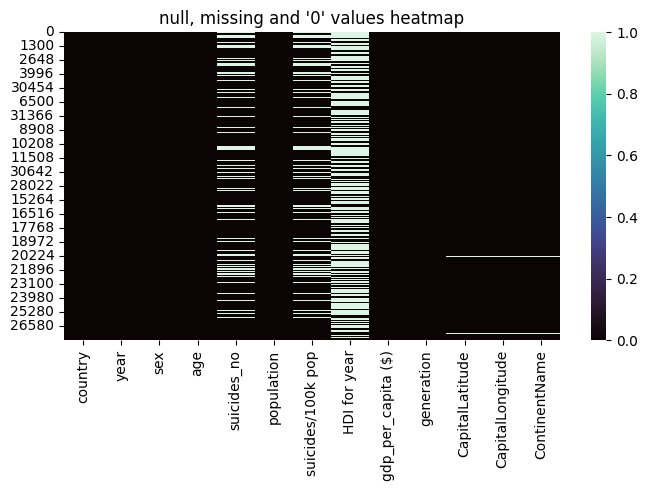


DUPLICATE VALUE COUNT:   0


In [15]:
plt.figure(figsize=(8,4))
plt.title('null, missing and \'0\' values heatmap')
sns.heatmap((dtsuicide.isnull()) | (dtsuicide == 0), cmap = 'mako')
plt.show()

print('\nDUPLICATE VALUE COUNT:  ', dtsuicide.duplicated().sum())

In [16]:
#melihat nilai null/missing data pada dtsuicide
dtsuicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
HDI for year          19456
gdp_per_capita ($)        0
generation                0
CapitalLatitude         240
CapitalLongitude        240
ContinentName           240
dtype: int64

* suicide_no memiliki missing value sebanyak 1200 baris
* HDI for year memiliki mising value sebanyak 19.456
* CapitalLatitude, CapitalLongitude, dan ContinentName memiliki 240 data null



---



### 3.2 Data Cleaning



***Notes Data Cleaning***
* Tahun (<2001) dihilangkan
* Data HDI_Tahun dihilangkan karena 2/3 datanya hilang/null
* Variabel Generasi tidak masuk ke dalam problem statement

#### 3.2.1 Mengubah Nama Masing-Masing Kolom pada data `dtsuicide`

Selanjutnya dilakukan renamed data untuk memudahkan pemilihan kolom mana yang ingin digunakan dan didrop serta, memudahkan pemanggilan dan pembacaan data.


In [17]:
#Variable nama baru : suicide_Renamed, menggunakan .rename untuk mengubah nama kolom yang diinginkan. Dan didefinisikan dengan "columns"
suicide_renamed = dtsuicide.rename(
    columns = {"country": "Negara", "year": "Tahun","sex": "Jenis_Kelamin", "age": "Umur", "suicides_no":"Jumlah_Bunuhdiri", "HDI for year": "HDI_Tahun",  "population": "populasi", "suicides/100k pop": "Bunuhdiri_per100kpop", "country-year": "Negara_Tahun", "gdp_per_capita ($)": "GDP_perkapita_usd", "generation": "Generasi", "ContinentName": "Benua", "CapitalLatitude":"Latitude", "CapitalLongitude":"Longitude"}
)
suicide_renamed.head()

,Negara,Tahun,Jenis_Kelamin,Umur,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,HDI_Tahun,GDP_perkapita_usd,Generasi,Latitude,Longitude,Benua
0,Albania,1987,male,15-24 years,21.0,312900,6.71,NaN,796.0,Generation X,41.316667,19.816667,Europe
1,Albania,1987,male,35-54 years,16.0,308000,5.19,NaN,796.0,Silent,41.316667,19.816667,Europe
2,Albania,1987,female,15-24 years,14.0,289700,4.83,NaN,796.0,Generation X,41.316667,19.816667,Europe
3,Albania,1987,male,75+ years,1.0,21800,4.59,NaN,796.0,G.I. Generation,41.316667,19.816667,Europe
4,Albania,1987,male,25-34 years,9.0,274300,3.28,NaN,796.0,Boomers,41.316667,19.816667,Europe


#### 3.2.2  Definisi dan Alias


Berikut adalah alias dan deskripsi dari tiap kolom telah direnamed dan didrop pada proses sebelumnya.


`Tabel.Alias dan Definisi Alias`

>|Label|Alias| Definisi|
|-----------|-------|---|
|country|Negara|Negara bunuh diri terjadi|
|year|Tahun|tahun bunuh diri terjadi|
|sex|Jenis_Kelamin| Jenis kelamin orang yang melakukan bunuh diri|
|age |Umur| Umur orang yang melakukan bunuh diri|
|suicide.no|Jumlah_Bunuhdiri| Banyaknya orang yang melakukan bunuh diri|
|population|Populasi|Populasi data dari orang yang melakukan bunuh diri|
|suicides/100k pop|Bunuhdiri_per100kpop|Jumlah populasi orang yang melakukan bunuh diri per 100 ribu orang|
|gdp_per_capita|GDP_perkapita_usd|ukuran ekonomi suatu negara tersebut|
|CapitalLatitude|Latitude|garis lintang sumbu Y |
|CapitalLongitude|Longitude|garis Bujur sumbu X |
|ContinentName|Benua|Area daratan negara-negara|

#### 3.2.3 View Data NAN

Agar ekplorasi data dapat diolah dan dapat berjalan dengan baik. Maka, data `suicide_renamed` harus diperiksa terlebih dahulu apakah terdapat nilai `null` /`NaN`.

Nilai tersebut dapat diolah pada pandas dengan menggunakan `.info()` untuk mengetahui kelengkapan data. Sementara untuk mengetahui tipe dari data tersebut, dapat digunakan `.isnull().sum()`

In [18]:
#tampilkan banyak data non_null dan tipe data tersebut
suicide_renamed.isnull().sum()

Negara                      0
Tahun                       0
Jenis_Kelamin               0
Umur                        0
Jumlah_Bunuhdiri         1200
populasi                    0
Bunuhdiri_per100kpop        0
HDI_Tahun               19456
GDP_perkapita_usd           0
Generasi                    0
Latitude                  240
Longitude                 240
Benua                     240
dtype: int64

* Berdasarkan data diatas, terdapat jumlah nilai null pada `suicides_no` sebesar 1200 dan `HDI_Tahun` sebanyak 19.456.

Untuk melihat lebih jelas keberadaan nilai null terhadap baris, digunakan heatmap untuk pada data tersebut, seperti berikut.

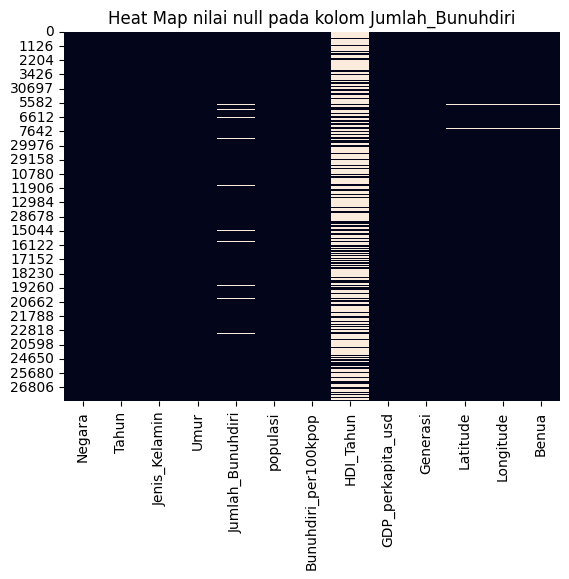

In [19]:
#Menampilkan keberadaan nilai null
sns.heatmap(suicide_renamed.isnull(), cbar=False)
plt.title("Heat Map nilai null pada kolom Jumlah_Bunuhdiri")
plt.show()

- Berdasarkan heatmap tersebut, HDI_Tahun akan di drop karena terlalu banyak data yang hilang. Demikian juga dengan baris-baris dari Jumlah_Bunuhdiri, CapitalLatitude, CapitalLongitude, dan ContinentName.



---



#### 3.2.4 Drop Kolom

Setelah diketahui dimana dan berapa banyak data yang bernilai null. Selanjutnya dilakukan drop kolom sesuai dengan problem statement yang ingin dipecahkan, diantaranya:
- Data kolom pada Negara_Tahun tidak digunakan karena kolom tersebut sudah dijabarkan pada Negara dan Tahun.
- HDI_Tahun punya terlalu banyak nilai null
- Baris pada Jumlah_Suicide akan di drop karena punya data null
- Data kolom Generasi tidak masuk pada problem statement milestone ini


In [20]:
# melakukan drop kolom untuk kolom 7, 8, 11 (Negara_Tahun, HDI_Tahun, Generasi)
suicide_drop= suicide_renamed.drop(suicide_renamed.columns[[[7, 9]]], axis=1)
suicide_drop.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:5339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Negara,Tahun,Jenis_Kelamin,Umur,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,GDP_perkapita_usd,Latitude,Longitude,Benua
0,Albania,1987,male,15-24 years,21.0,312900,6.71,796.0,41.316667,19.816667,Europe
1,Albania,1987,male,35-54 years,16.0,308000,5.19,796.0,41.316667,19.816667,Europe
2,Albania,1987,female,15-24 years,14.0,289700,4.83,796.0,41.316667,19.816667,Europe
3,Albania,1987,male,75+ years,1.0,21800,4.59,796.0,41.316667,19.816667,Europe
4,Albania,1987,male,25-34 years,9.0,274300,3.28,796.0,41.316667,19.816667,Europe


#### 3.2.5 Drop data NaN

Setelah diketahui keberadaan nilai null pada `s_GDP`, perlu diketahui terlebih dahulu apakah data null ini bisa kita isi dengan nilai 0 atau dengan asumsi tertentu. Namun karena data yang diolah sebaiknya data yang akurat sesuai dengan raw data, maka diputuskan untuk seluruh baris null pada `Jumlah_Bunuhdiri` akan dihilangkan atau di drop.

In [21]:
#salin data untuk variabel drop
s_nonull= suicide_drop.copy()

In [22]:
#Melihat jika terdapat nilai null pada masing-masing kolom
s_nonull.isnull().any()

Negara                  False
Tahun                   False
Jenis_Kelamin           False
Umur                    False
Jumlah_Bunuhdiri         True
populasi                False
Bunuhdiri_per100kpop    False
GDP_perkapita_usd       False
Latitude                 True
Longitude                True
Benua                    True
dtype: bool

In [23]:
#melihat banyak data per bari baris null terhadap Jumlah_Bunuhdiri
null_Values=s_nonull[s_nonull[["Jumlah_Bunuhdiri", "Latitude", "Longitude", "Benua"]].isnull()]

In [24]:
#Tampilkan data isnull terhadap "Jumlah_Bunuhdiri"
null_Values.head()

,Negara,Tahun,Jenis_Kelamin,Umur,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,GDP_perkapita_usd,Latitude,Longitude,Benua
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Drop baris berdasarkan Jumlah_Bunuhdiri
s_nonull=s_nonull.dropna()

In [26]:
#Tampilkan jumlah null
s_nonull.isnull().sum()

Negara                  0
Tahun                   0
Jenis_Kelamin           0
Umur                    0
Jumlah_Bunuhdiri        0
populasi                0
Bunuhdiri_per100kpop    0
GDP_perkapita_usd       0
Latitude                0
Longitude               0
Benua                   0
dtype: int64

In [27]:
#Bandingkan data sebelum dihilangkan null dan sesudah
print("Sebelum dihilangkan null (Baris, Kolom):", suicide_drop.shape)
print("Sesudah dihilangkan null (Baris, Kolom):", s_nonull.shape)

Sebelum dihilangkan null (Baris, Kolom): (31756, 11)
Sesudah dihilangkan null (Baris, Kolom): (30376, 11)


- Semua data null telah dihilangkan untuk seluruh data pada kolom-kolom tersebut.

#### 3.2.6 Pengecekan Ulang

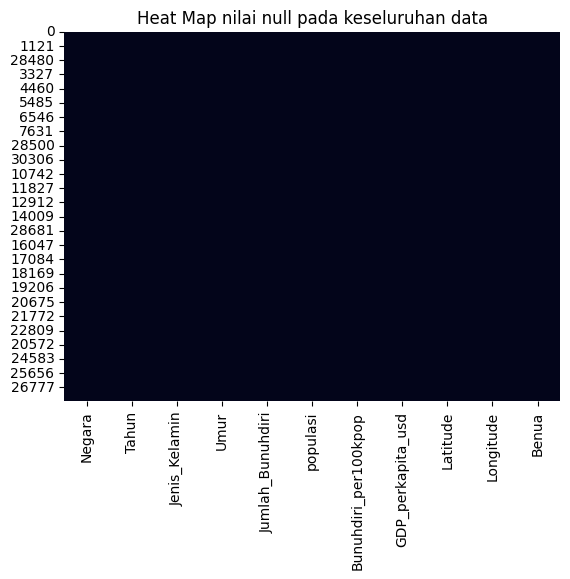

In [28]:
#Menampilkan keberadaan nilai null
sns.heatmap(s_nonull.isnull(), cbar=False)
plt.title("Heat Map nilai null pada keseluruhan data")
plt.show()

* Data Null pada variable s_nonull sudah tidak ada lagi

<br>
<br>

---



### 3.3 Data Atribut

Berikut adalah data atribut untuk masing-masing kolom.

| Kolom | Tipe | Deskripsi |
| :--- | :--- | :--- |
| **Negara** | categorical | Nama Negara |
| **Tahun** | numerical | Data Tahun |
| **Jenis_Kelamin** | categorical |Jenis Kelamin orang yang bunuh diri |
| **Umur** | categorical |Usia orang yang bunuh diri |
| **Jumlah_Bunuhdiri** | numerical | Banyaknya orang yang bunuh diri |
| **Populasi** | numerical | Populasi negara tersebut |
| **Bunuhdiri_per100k_usd** | numerical | Bunuhdiri per 100k populasi |
| **GDP_perkapita** | numerical | Gross Domestic Product per orang |
| **Latitude** | numerical | latitude (untuk maps) |
| **lLongitude** | numerical | longitude (untuk maps) |
| **Benua** | categorical |Nama Benua |

#### 3.3.1 Mengubah Tipe Data

Selanjutnya dilakukan pengecekan tipe data untuk masing-masing kolom. Jika tidak sesuai maka akan diubah sesuai dengan tipenya.

In [29]:
#buat variable baru untuk mengubah tipe data
s_GDP= s_nonull.copy()

In [30]:
s_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30376 entries, 0 to 31591
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Negara                30376 non-null  object 
 1   Tahun                 30376 non-null  int64  
 2   Jenis_Kelamin         30376 non-null  object 
 3   Umur                  30376 non-null  object 
 4   Jumlah_Bunuhdiri      30376 non-null  float64
 5   populasi              30376 non-null  int64  
 6   Bunuhdiri_per100kpop  30376 non-null  float64
 7   GDP_perkapita_usd     30376 non-null  float64
 8   Latitude              30376 non-null  float64
 9   Longitude             30376 non-null  float64
 10  Benua                 30376 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 2.8+ MB


In [31]:
#buat list data bertipe object dan number
obj_cols= list(s_GDP.select_dtypes('object'))
num_cols= list(s_GDP.select_dtypes('number'))
print("Tipe data Objek:",obj_cols)
print("Tipe data Number:",num_cols)

Tipe data Objek: ['Negara', 'Jenis_Kelamin', 'Umur', 'Benua']
Tipe data Number: ['Tahun', 'Jumlah_Bunuhdiri', 'populasi', 'Bunuhdiri_per100kpop', 'GDP_perkapita_usd', 'Latitude', 'Longitude']


Semua tipe data telah sesuai dengan ketentuan. Selanjutnya perlu dilakukan pengisian/drop data null pada baris yang tidak memiliki nilai.



---



#### 3.3.2 Nilai Duplikat

Duplikasi pada data dapat menyebabkan hasil data yang tidak akurat. Sehingga perlu dilakukan pengecekan apakah terdapat nilai duplikat atau tidak pada dataset tersebut.

In [32]:
# Salin ke variable baru untuk menghapus nilai duplikat akhir
s_duplicate=s_GDP.copy()

In [33]:
#cek terlebih dahulu berapa jumlah data/baris pada variabel yang telah disalin
print("Jumlah data sebelum duplikat dihilangkan:\n",s_duplicate.count(),"\n")

Jumlah data sebelum duplikat dihilangkan:
 Negara                  30376
Tahun                   30376
Jenis_Kelamin           30376
Umur                    30376
Jumlah_Bunuhdiri        30376
populasi                30376
Bunuhdiri_per100kpop    30376
GDP_perkapita_usd       30376
Latitude                30376
Longitude               30376
Benua                   30376
dtype: int64 



Total jumlah data pada `s_duplicate` adalah sebesar 30376 yang merupakan data salinan dari `s_GDP`.
Selanjutnya, tampilkan dan hitung jumlah data yang terduplikasi pada data `s_duplicate`

In [34]:
#Mencari banyak data terduplikasi pada s_duplicate

#Jika duplicated adalah data terduplikasi pada s_duplicate,
if (duplicated := s_duplicate.duplicated()).any():

    #susun some_duplicates secara series dan tampilkan 5 nilai data teratas
    some_duplicates = s_duplicate[duplicated].sort_values(by=s_duplicate.columns.to_list()).head()

    #lalu hitung banyaknya data terduplikasi tersebut dalam variabel s_count
    s_count = s_duplicate[duplicated].sort_values(by=s_duplicate.columns.to_list()).count()

    #Print data terduplikasi jika terdapat data terduplikasi
    print(f"DataFrame ini memiliki beberapa data duplikat, seperti:\n{some_duplicates}, \n")

    #print jumlah data terduplikasi jika terdapat data terduplikasi
    print(f"Dengan total data duplikat sebanyak:\n{s_count}, \n")

#jika tidak,
else:
  #maka print "tidak ada data terduplikasi"
  print(f"Tidak ada data terduplikasi")

Tidak ada data terduplikasi


- Tidak ada yang terduplikasi pada data variable s_duplicate

#### 3.3.3 Filtering

In [35]:
#Data difilter dan hanya diambil seluruh tahun diatas 2001
s_duplicate = s_duplicate.loc[(s_duplicate['Tahun'] >=2001)].reset_index()
s_filter=s_duplicate.copy()
s_filter

,index,Negara,Tahun,Jenis_Kelamin,Umur,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,GDP_perkapita_usd,Latitude,Longitude,Benua
0,144,Albania,2001,male,25-34 years,22.0,206484,10.650000,1451.000000,41.316667,19.816667,Europe
1,145,Albania,2001,male,35-54 years,34.0,378826,8.980000,1451.000000,41.316667,19.816667,Europe
2,146,Albania,2001,male,55-74 years,11.0,196670,5.590000,1451.000000,41.316667,19.816667,Europe
3,147,Albania,2001,female,75+ years,2.0,47254,4.230000,1451.000000,41.316667,19.816667,Europe
4,148,Albania,2001,male,15-24 years,10.0,256039,3.910000,1451.000000,41.316667,19.816667,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
17687,30279,Uzbekistan,2019,female,15-24 years,456.0,33580350,1.357937,1784.009816,41.316667,69.250000,Asia
17688,30607,Uzbekistan,2019,female,25-34 years,212.0,33580350,0.631322,1784.009816,41.316667,69.250000,Asia
17689,30935,Uzbekistan,2019,female,35-54 years,118.0,33580350,0.351396,1784.009816,41.316667,69.250000,Asia
17690,31263,Uzbekistan,2019,female,55-74 years,26.0,33580350,0.077426,1784.009816,41.316667,69.250000,Asia


In [36]:
s_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17692 entries, 0 to 17691
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 17692 non-null  int64  
 1   Negara                17692 non-null  object 
 2   Tahun                 17692 non-null  int64  
 3   Jenis_Kelamin         17692 non-null  object 
 4   Umur                  17692 non-null  object 
 5   Jumlah_Bunuhdiri      17692 non-null  float64
 6   populasi              17692 non-null  int64  
 7   Bunuhdiri_per100kpop  17692 non-null  float64
 8   GDP_perkapita_usd     17692 non-null  float64
 9   Latitude              17692 non-null  float64
 10  Longitude             17692 non-null  float64
 11  Benua                 17692 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 1.6+ MB




---



### 3.4 Data Overview

`Suicide Rates Overview 1895 to 2021` tidak mencakup semua negara-negara di dunia. Termasuk negara-negara dengan jumlah populasi 10 terbesar didunia seperti, Indonesia, China, Pakistan, Nigeria, Bangladesh, Russia, Mexico, Brazil, United Stated, dan India.

#### 3.4.1 Data

In [37]:
#buat variable overview
Overview_s= s_duplicate.copy()

In [38]:
#10 negara dengan populasi terbesar di didunia
top10 = ['Indonesia', 'China', 'Pakistan', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico', 'Brazil', 'United State', 'India']
in_set = Overview_s.Negara[Overview_s.Negara.str.contains('|'.join(top10))].unique().tolist()

print('Dari 10 Negara dengan populasi terbesar:\n{}\n\nHanya {} yang ada pada dataset ini diantarannya:\n{}'.format(top10,len(in_set),in_set))

#  dataset
print('\n\nDataset memiliki', len(Overview_s['Negara'].unique()),'Negara pada' ,len(Overview_s['Benua'].unique()),'benua selama' ,len(Overview_s['Tahun'].unique()),'years.')

Dari 10 Negara dengan populasi terbesar:
['Indonesia', 'China', 'Pakistan', 'Nigeria', 'Bangladesh', 'Russia', 'Mexico', 'Brazil', 'United State', 'India']

Hanya 4 yang ada pada dataset ini diantarannya:
['Brazil', 'Mexico', 'Russia', 'United States']


Dataset memiliki 105 Negara pada 7 benua selama 20 years.


In [39]:
Overview_s.head()

,index,Negara,Tahun,Jenis_Kelamin,Umur,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,GDP_perkapita_usd,Latitude,Longitude,Benua
0,144,Albania,2001,male,25-34 years,22.0,206484,10.65,1451.0,41.316667,19.816667,Europe
1,145,Albania,2001,male,35-54 years,34.0,378826,8.98,1451.0,41.316667,19.816667,Europe
2,146,Albania,2001,male,55-74 years,11.0,196670,5.59,1451.0,41.316667,19.816667,Europe
3,147,Albania,2001,female,75+ years,2.0,47254,4.23,1451.0,41.316667,19.816667,Europe
4,148,Albania,2001,male,15-24 years,10.0,256039,3.91,1451.0,41.316667,19.816667,Europe


In [40]:
#  membuat dataframe benua
#  Populasi, persen populasi and banyak negara per benua
Overview_s= s_duplicate.copy()
df_benua = Overview_s.groupby('Benua')['populasi'].sum().reset_index()
df_benua['Persen_populasi'] = df_benua['populasi']*100/df_benua['populasi'].sum()
df_benua

,Benua,populasi,Persen_populasi
0,Africa,5861395609,6.099010
1,Asia,19511272290,20.302237
2,Australia,1547979738,1.610733
3,Central America,15648869611,16.283257
4,Europe,34861513695,36.274760
5,North America,969930661,1.009251
6,South America,17703089681,18.420753


In [41]:
#  jumlah negara terhadap benua
cntcont= Overview_s['Negara'].groupby(Overview_s['Benua']).nunique()
cntcont

Benua
Africa              5
Asia               22
Australia           4
Central America    10
Europe             43
North America      11
South America      10
Name: Negara, dtype: int64

In [42]:
# Tambahkan count_Negara ke df_benua
df_benua['count_Negara'] = cntcont[df_benua['Benua']].values
df_benua


,Benua,populasi,Persen_populasi,count_Negara
0,Africa,5861395609,6.099010,5
1,Asia,19511272290,20.302237,22
2,Australia,1547979738,1.610733,4
3,Central America,15648869611,16.283257,10
4,Europe,34861513695,36.274760,43
5,North America,969930661,1.009251,11
6,South America,17703089681,18.420753,10


#### 3.4.2 Plot Data Overview

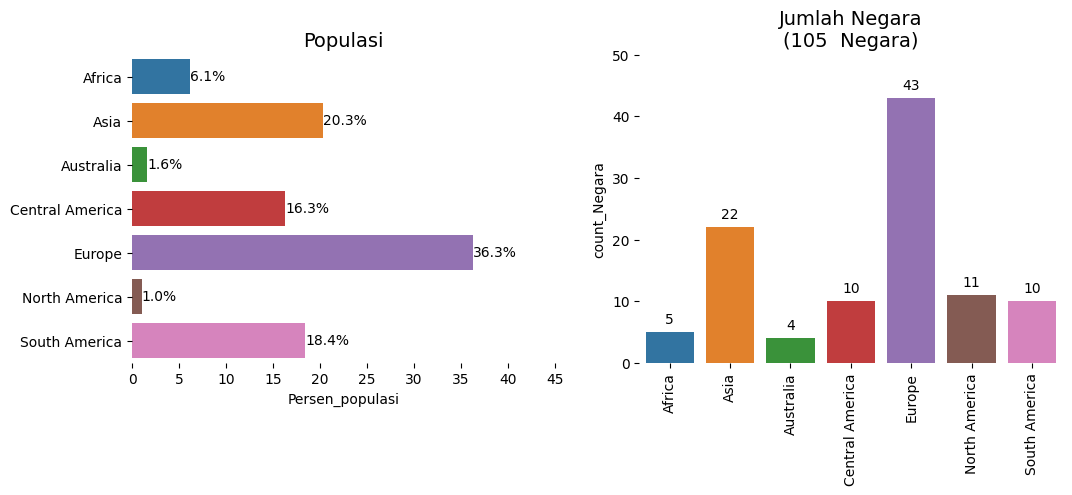

In [43]:
#  PLOTs - Populasi dan Negara terhadap Benua masing-masing negara
plt.figure(figsize=(12,4))
plt.subplot(121)
ax = sns.barplot(data = df_benua, x = 'Persen_populasi', y='Benua')
plt.title('Populasi', fontsize=14)
plt.xlim([0,45])
plt.ylabel("")
plt.box(False)
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.4), ha='left', va='center')


plt.subplot(122)
ax = sns.barplot(data = df_benua, x = 'Benua', y='count_Negara')
plt.title('Jumlah Negara\n({}  Negara)'.format(df_benua.count_Negara.sum()), fontsize=14)
plt.xlabel('')
plt.xticks(rotation = 90)
plt.ylim([0,50])
plt.box(False)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+2), ha='center', va='center')

plt.show()

**Data Overview- Insight**

* 6 negara dengan populasi terbesar hilang seperti Indonesia, China, Pakistan, Nigeria, Bangladesh,  India
* Banyak negara yang tidak lengkap dan data benua eropa yang paling tertingi.
* Eropa memiliki 43 negara dari 108 negara dan merupakan 36 % dari jumlah populasi.
* Africa hanya terdiri dari 4 negara sementara jumlah negara di benua Africa adalah sebanyak 54 negara.



---




<ipython-input-44-88165d0ffb42>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_Benua_Bunuhdiri= s_duplicate.groupby('Benua').mean().sort_values('Bunuhdiri_per100kpop', ascending=False).reset_index()


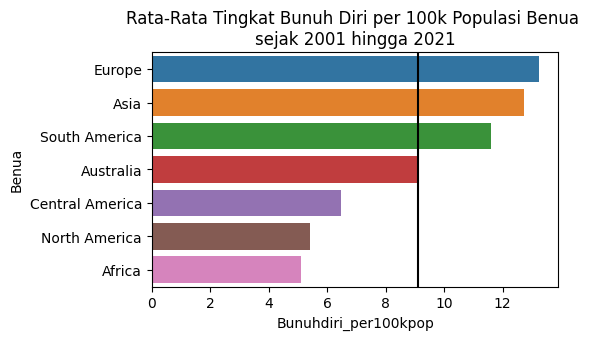

In [44]:
by_Benua_Bunuhdiri= s_duplicate.groupby('Benua').mean().sort_values('Bunuhdiri_per100kpop', ascending=False).reset_index()


plt.figure(figsize=(10,6))
plt.subplot(221)
sns.barplot(x='Bunuhdiri_per100kpop',y='Benua',data=by_Benua_Bunuhdiri)
plt.axvline(x=by_Benua_Bunuhdiri['Bunuhdiri_per100kpop'].mean(), color='k')
plt.gca().xaxis.tick_bottom()
plt.title('Rata-Rata Tingkat Bunuh Diri per 100k Populasi Benua \nsejak 2001 hingga 2021')

plt.tight_layout()

***Insight***:
* Eropa memiliki rata-rata kasus bunuh diri terbanyak yang disusul oleh benua asia dan Amerika selatan.
* Benua Australia memiliki nilai rata-rata yang sebanding dengan rata-rata tingkat kasus bunuh diri secara keseluruhan.

#### 3.4.2 Tingkat Bunuh Diri Global Berdasarkan Negaranya

<ipython-input-45-6d14ee25b442>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_Negara_Bunuhdiri= s_duplicate.groupby('Negara').mean().sort_values('Bunuhdiri_per100kpop', ascending=False).reset_index()


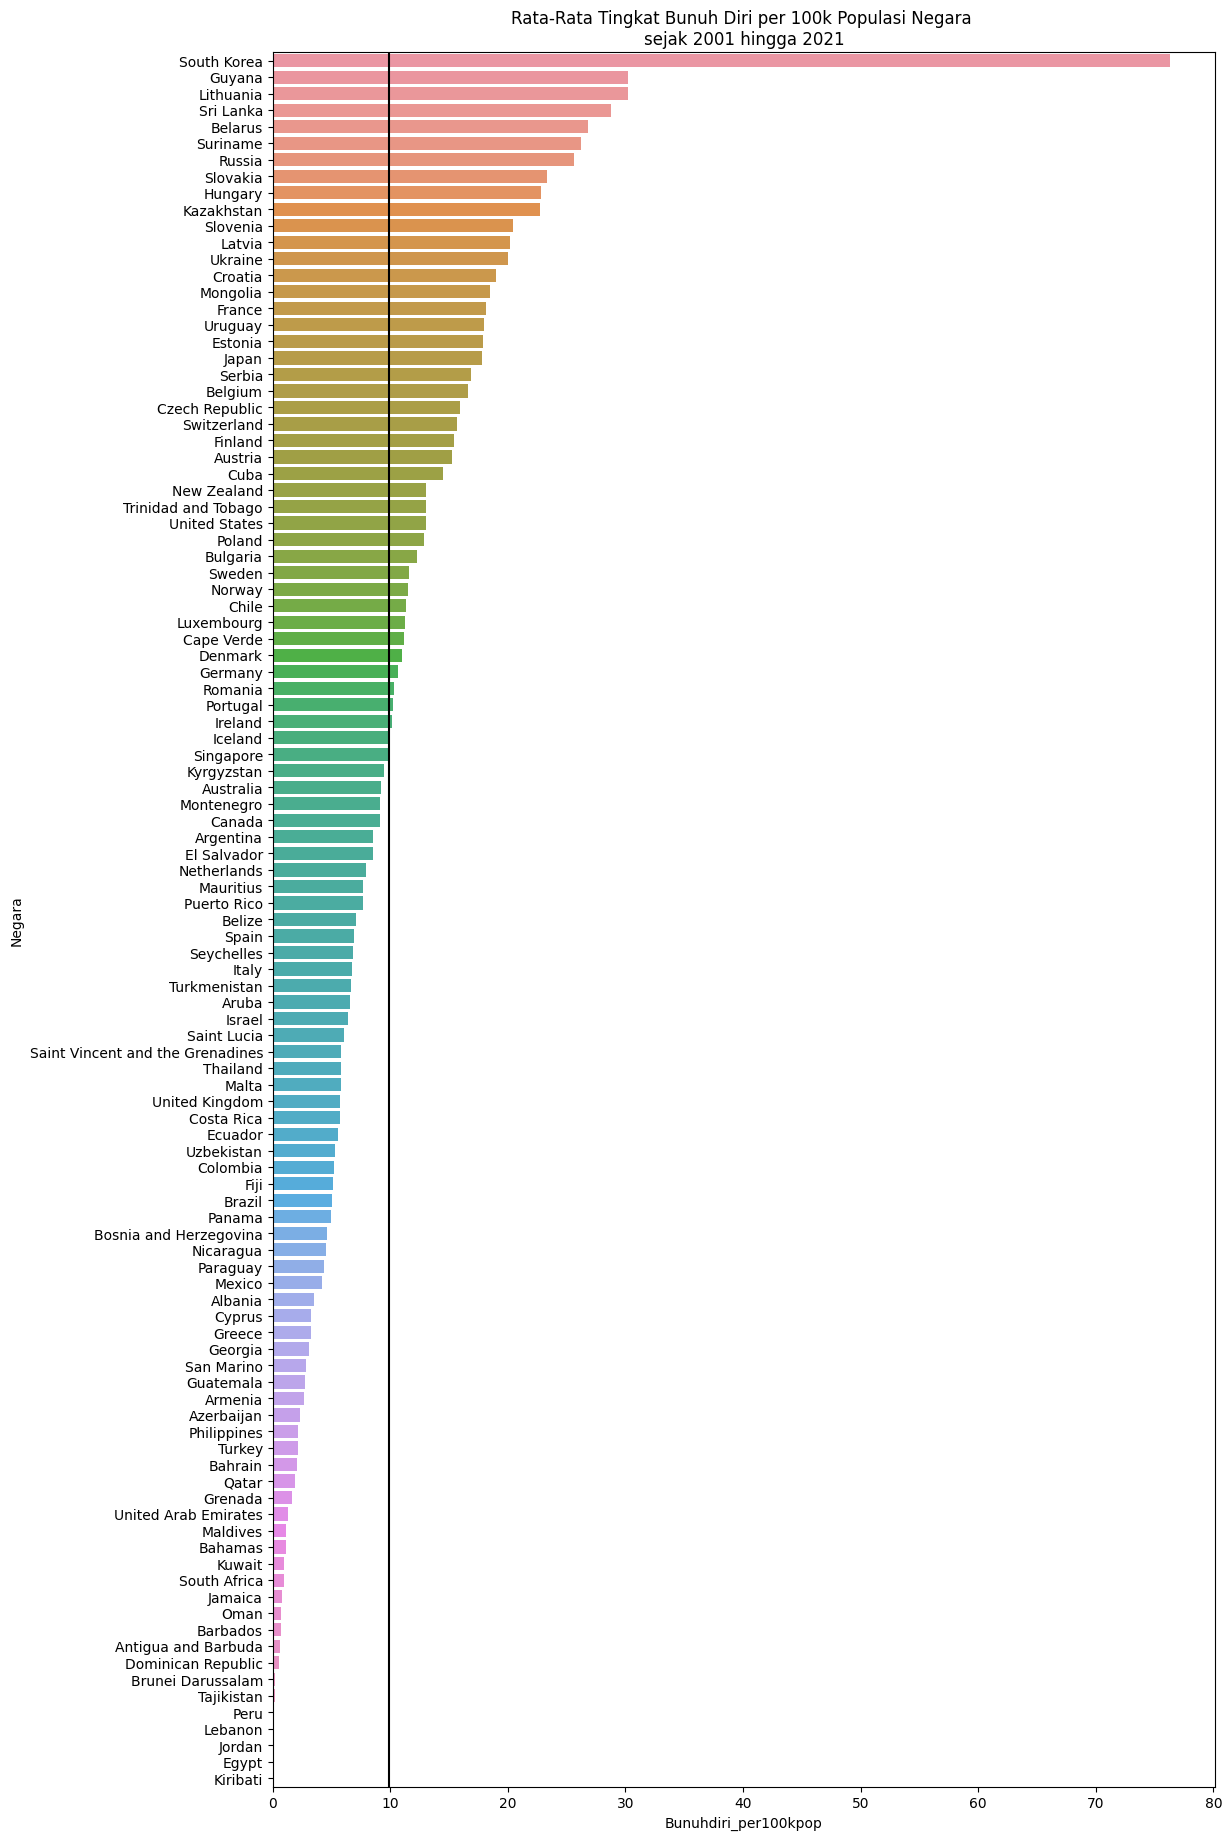

In [45]:
by_Negara_Bunuhdiri= s_duplicate.groupby('Negara').mean().sort_values('Bunuhdiri_per100kpop', ascending=False).reset_index()


plt.figure(figsize=(22,36))
plt.subplot(221)
sns.barplot(x='Bunuhdiri_per100kpop',y='Negara',data=by_Negara_Bunuhdiri)
plt.axvline(x=by_Negara_Bunuhdiri['Bunuhdiri_per100kpop'].mean(), color='k')
plt.gca().xaxis.tick_bottom()
plt.title('Rata-Rata Tingkat Bunuh Diri per 100k Populasi Negara \nsejak 2001 hingga 2021')

plt.tight_layout()

***Insight:***
* Rata- rata tingkat bunuh diri global adalah 13 orang per 100k populasi
* Namun, Negara dengan tingkat bunuh diri tertinggi global adalah `South Korea` dengan total sekitar 78 orang per 100k populasi

## 4 DATA DISTRIBUSI DAN OUTLIER

### 4.1 Mengecek Distribusi Data

In [46]:
#Tampilkan data s_filter

pd.options.display.float_format = '{:.1f}'.format
s_filter.describe()

,index,Tahun,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,GDP_perkapita_usd,Latitude,Longitude
count,17692.0,17692.0,17692.0,17692.0,17692.0,17692.0,17692.0,17692.0
mean,16382.6,2009.4,225.2,5432062.6,11.1,22054.5,27.7,5.6
std,9210.9,5.4,815.3,18102751.6,22.9,22196.2,26.5,62.7
min,144.0,2001.0,0.0,294.0,0.0,345.0,-41.3,-99.1
25%,8334.8,2005.0,3.0,136435.8,0.4,5561.0,12.5,-58.7
50%,16513.5,2009.0,24.0,559398.5,3.7,13400.0,38.0,14.5
75%,24344.2,2013.0,121.0,3167306.0,13.4,32874.0,48.2,35.2
max,31755.0,2020.0,21262.0,211782878.0,515.1,126352.0,64.2,178.4


Penjelasanan:
- Seluruh nilai rata-ratanya bernilai jauh dengan masing-masing nilai mediannya, kesimpulan awal adalah semua data tersebut tidak terdistribusi normal.
- Jauhnya nilai rata-rata tersebut ditunjukkan oleh besarnya standar deviasi untuk masing-masing features.
- pada Jumlah_Bunuhdiri terdapat nilai minimum 0 yang berarti tidak ada kasus bunuh diri pada tahun dan negara tersebut.
- nilai GDP per kapita memiliki nilai terendah sebesar `$251` dan  tertingi sebesar `$126.352`
- Jumlah populasi terkecil adalha sebanyak 278 orang dan terbanyak adalah 211.782.878 orang

In [47]:
s_filter[obj_cols].describe()

,Negara,Jenis_Kelamin,Umur,Benua
count,17692,17692,17692,17692
unique,105,2,6,7
top,Lithuania,male,25-34 years,Europe
freq,238,8846,2954,8114


Penjelasan:
- Terdapat 108 Negara yang artinya negara yang ditinjau adalah sebanyak 108 dari 195 jumlah negara didunia (source: Theworldmeter)
- Jumlah tahun untuk abad 21 sebanyak 20 tahun
- Jenis kelamin terdiri dari perempuan dan laki-laki yang terdiri dari 2 unik data
- kategori umur terdiri dari 6 kategori, dengan pada kategori umur 25-34 tingkat bunuh diri yang paling sering/tertinggi




---



<ipython-input-48-1b309dbf9b8e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 1)


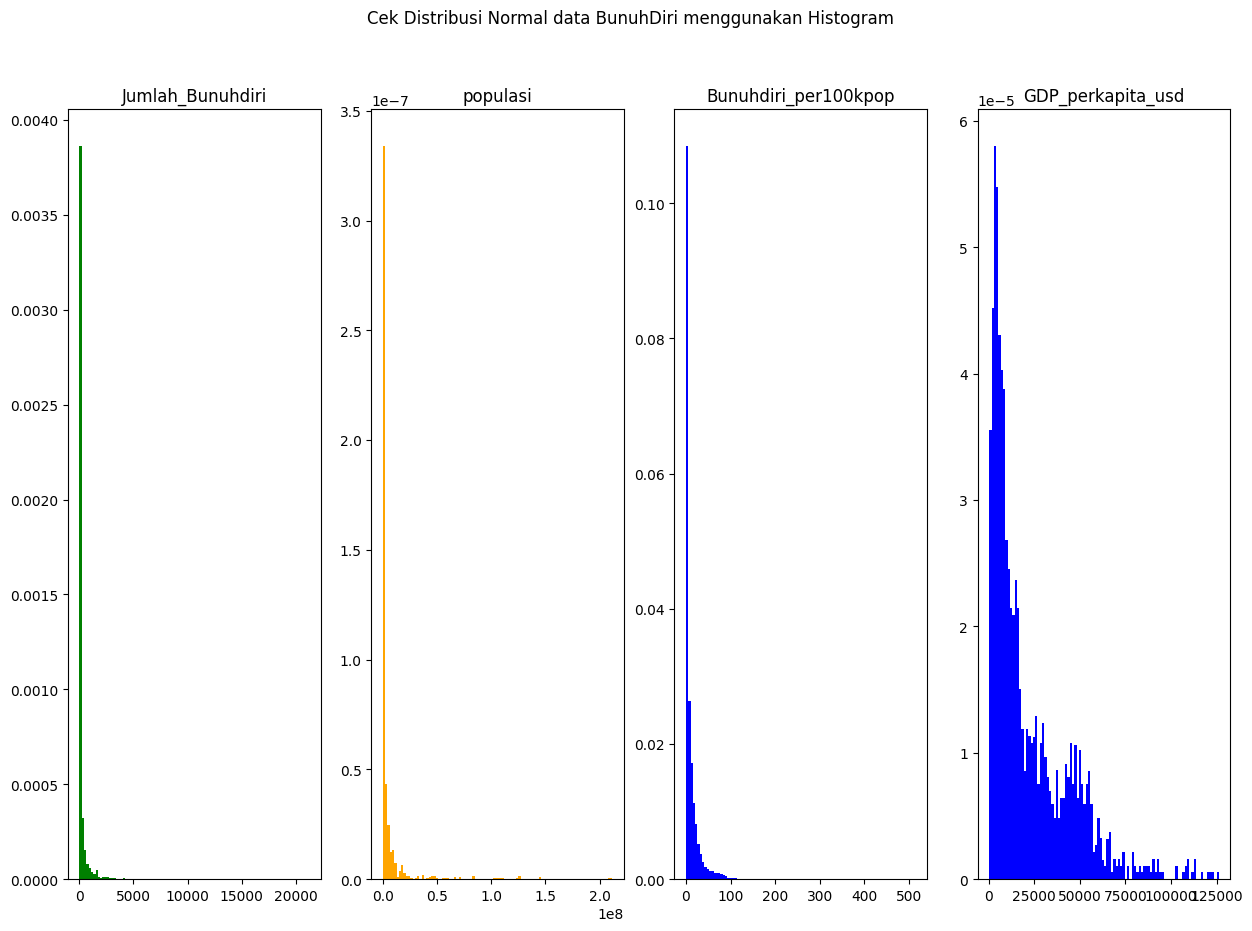

In [48]:
plt.rcParams["figure.figsize"] = (15,10)
plt.xlim([0,100])

plt.subplot(1, 4, 1)
math = plt.hist(s_filter['Jumlah_Bunuhdiri'], 100, density = True, color = "green")
plt.title("Jumlah_Bunuhdiri")

plt.subplot(1, 4, 2)
reading = plt.hist(s_filter['populasi'], 100, density = True, color = "orange")
plt.title("populasi")

plt.subplot(1, 4, 3)
reading = plt.hist(s_filter['Bunuhdiri_per100kpop'],100, density = True, color = "blue")
plt.title("Bunuhdiri_per100kpop")

plt.subplot(1, 4, 4)
reading = plt.hist(s_filter['GDP_perkapita_usd'],100, density = True, color = "blue")
plt.title("GDP_perkapita_usd")


plt.suptitle("Cek Distribusi Normal data BunuhDiri menggunakan Histogram")
plt.show()

Berdasarkan data tersebut:
- Data-data numerik tersebut tidak terdistribusi normal
- tampilan signifikan yang terlihat adalah pada GDP_perkapita_usd bahwa data tersebut terdistribusi miring positif dengan nilai mean> mediannya
- Namun berdasarkan tujuan dari data tersebut, distribusi tidak normal ini cukup masuk akal. Karena besar GDP suatu negara tergantung dari faktor lingkungan, faktor pekerjaan, faktor inflasi, faktor mata uang dan sebagainya.



---



#### 4.1.1. Missing Data Benua

Text(0.5, 1.0, 'Jumlah Data Benua \nFrom 2001 to 2021')

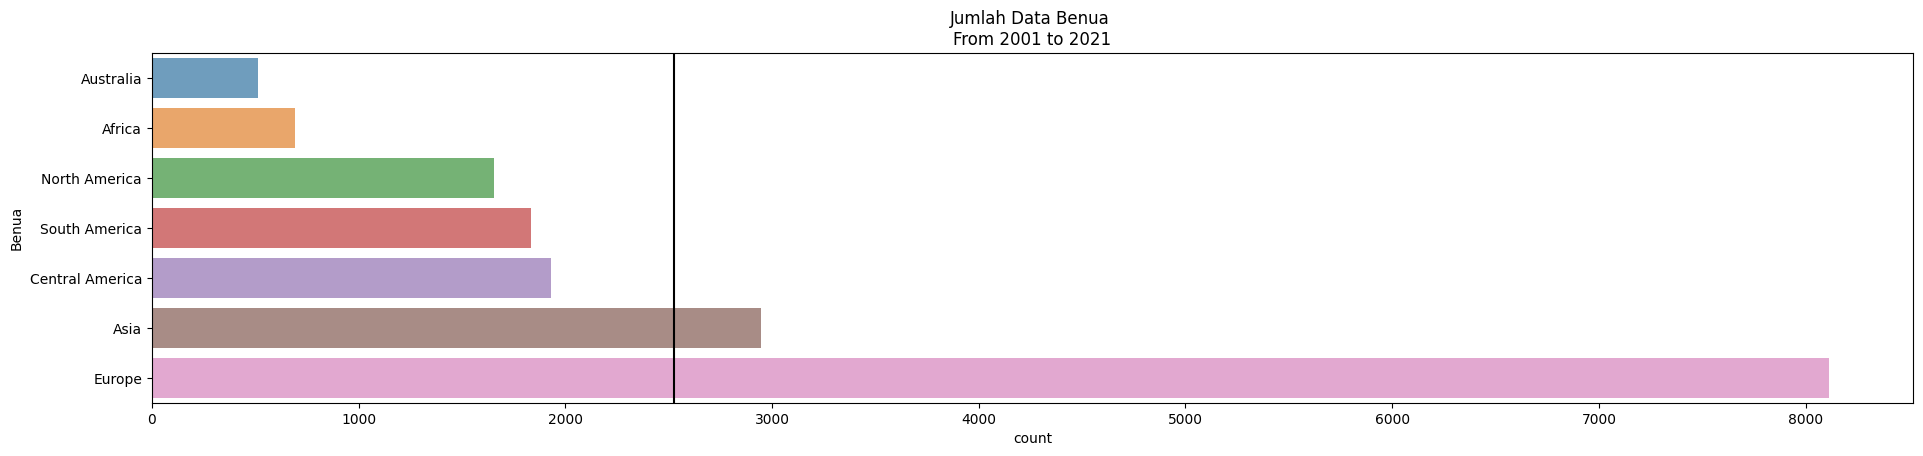

In [49]:
plt.figure(figsize=(50,10))
plt.subplot(221)
sns.countplot(y='Benua',data=s_filter, alpha=0.7, order=reversed(s_filter['Benua'].value_counts().index))
plt.axvline(x=s_filter['Benua'].value_counts().mean(), color='k')
plt.gca().xaxis.tick_bottom()
plt.title('Jumlah Data Benua \nFrom 2001 to 2021')

* Dapat terlihat bahwa beberapa Benua memiliki jumlah data yang kecil/sedikit
* Oleh karena itu, perlu dihitung datanya dengan box plot dan density distribution

Text(0.5, 1.0, 'Jumlah Data Distribusi Densitas terhadap Negara')

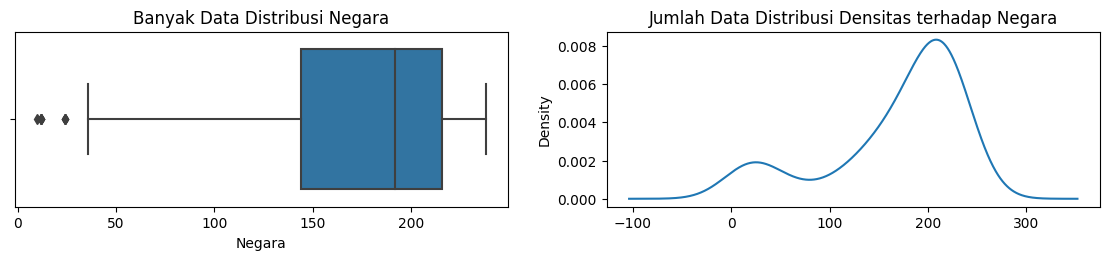

In [50]:
# Ingin melihat apakah terdapt outliner?
plt.figure(figsize=(14,5))
plt.subplot(221)
sns.boxplot(x=s_filter['Negara'].value_counts())
plt.gca().xaxis.tick_bottom()
plt.title('Banyak Data Distribusi Negara')

plt.subplot(222)
s_filter['Negara'].value_counts().plot.kde()
plt.gca().xaxis.tick_bottom()
plt.title('Jumlah Data Distribusi Densitas terhadap Negara')

* Data benua terhadap data distribusi memiliki skewed ke arah positif

#### 4.1.2 Data Kuantitas pada Umur dan Jenis Kelamin

Text(0.5, 1.0, 'Banyak Data Jenis Kelamin')

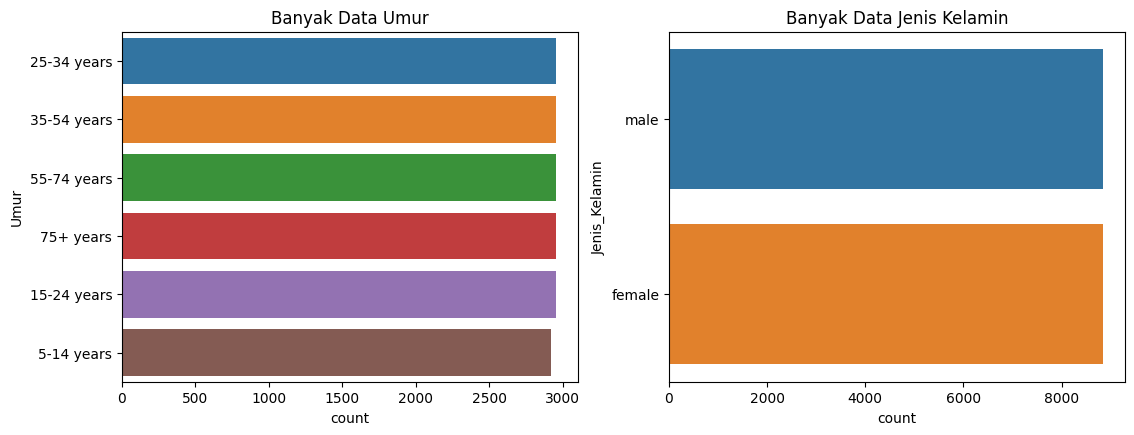

In [51]:
plt.figure(figsize=(20,10))
#fig.subplots_adjust(hspace=0.4, wspace=1)

plt.subplot(232)
sns.countplot(y='Umur',data=s_filter)
plt.gca().xaxis.tick_bottom()
plt.title('Banyak Data Umur')

plt.subplot(233)
sns.countplot(y='Jenis_Kelamin',data=s_filter)
plt.gca().xaxis.tick_bottom()
plt.title('Banyak Data Jenis Kelamin')

* Jumlah data antar kategori umur bernilai sama, kecuali untuk kategori umur 5-14 tahun, jumlah datanya cukup kecil
* Jumlah data antara Jenis kelamin perempuan dan laki-laki adalah sama.

### 4.1.3 Mengecek Ouliers

<Axes: xlabel='GDP_perkapita_usd'>

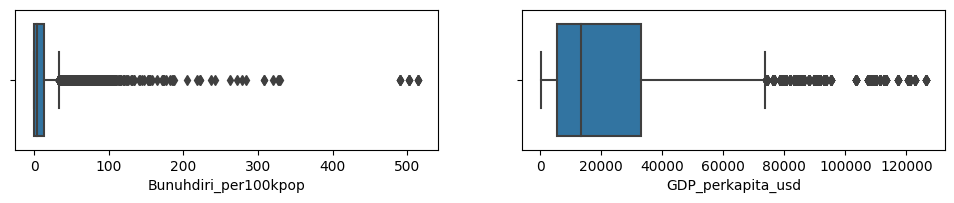

In [52]:
#tampilkan outliner pada Bunuhdiri_per100kpop dan GDP_perkapita_usd

suicide_trend=s_duplicate.copy()
plt.figure(figsize=(12,4))
plt.subplot(221)
sns.boxplot(x=suicide_trend['Bunuhdiri_per100kpop'])
plt.subplot(222)
sns.boxplot(x=suicide_trend['GDP_perkapita_usd'])

Insight:
* Bunuhdiri_per100kpop lebih skewed dibandingkan dengan GDP_perkapita_usd
* karena data tersebut tidak terdistribusi normal, maka digunakan IQR

In [53]:
#Mencari nilai IQR
def subset_by_iqr(suicide_trend, column, whisker_width=1.5):

    # Hitung nilai Q1, Q2 and IQR
    q1 = suicide_trend[column].quantile(0.25)
    q3 = suicide_trend[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers

    filter = (suicide_trend[column] >= q1 - whisker_width*iqr) & (suicide_trend[column] <= q3 + whisker_width*iqr)
    return suicide_trend.loc[filter]


filtered_suicide = subset_by_iqr(suicide_trend, 'Bunuhdiri_per100kpop', whisker_width=1.5)
filtered_gpd = subset_by_iqr(suicide_trend, 'GDP_perkapita_usd', whisker_width=1.5)

filtered_suicide = filtered_suicide.rename(columns ={'Bunuhdiri_per100kpop' : 'filtered_Bunuhdiri_per100kpop'})
filtered_gpd = filtered_gpd.rename(columns ={'GDP_perkapita_usd' : 'filtered_GDP_perkapita_usd'})

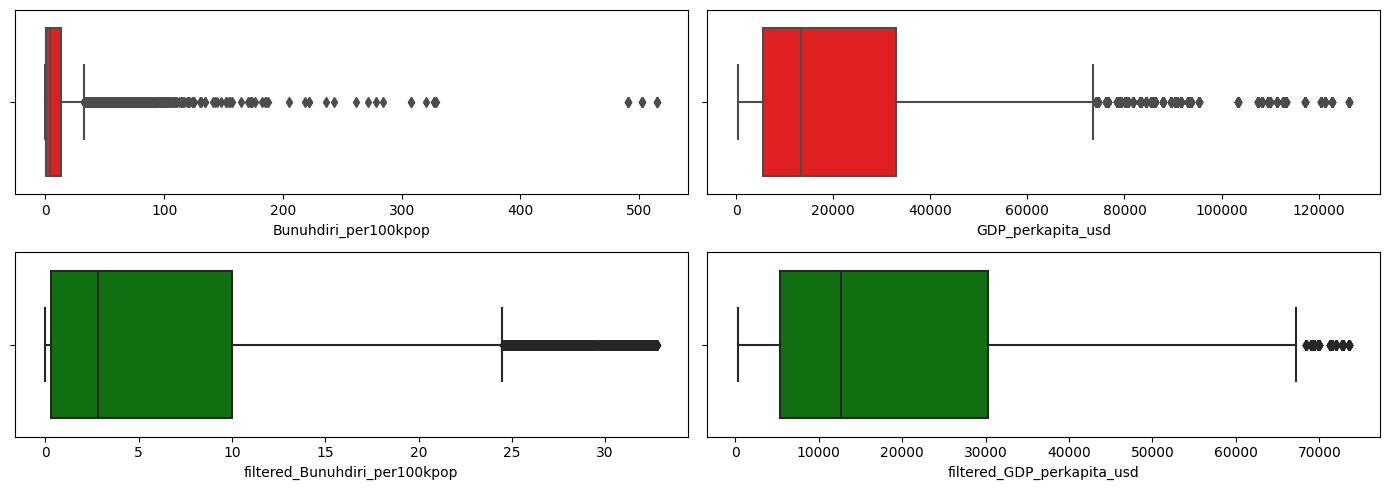

In [54]:
#Melakukan plot pada outlier sebelum dan sesudah dihilangkan outliernya.
plt.figure(figsize=(14,5))
plt.subplot(221)
sns.boxplot(x=suicide_trend['Bunuhdiri_per100kpop'], color = 'red')
plt.gca().xaxis.tick_bottom()

plt.subplot(222)
sns.boxplot(x=suicide_trend['GDP_perkapita_usd'],  color = 'red')
plt.gca().xaxis.tick_bottom()

plt.subplot(223)
sns.boxplot(x=filtered_suicide['filtered_Bunuhdiri_per100kpop'],color = 'g')
plt.gca().xaxis.tick_bottom()

plt.subplot(224)
sns.boxplot(x=filtered_gpd['filtered_GDP_perkapita_usd'], color = 'g')
plt.gca().xaxis.tick_bottom()


plt.tight_layout()

Insight:
* Boxplot warna merah adalah boxpplot Bunuhdiri_per100kpop dan GDP_perkapita_usd sebelum data outlier dihilangkan

* Boxplot warna hijau adalah Bunuhdiri_per100kpop dan GDP_perkapita_usd setelah data outlier dihilangkan

* Terlihat bahwa setelah data outlier dihilangkan, nilai skewed lebih berkurang dibanding yang sebelumnya.

* untuk menemukan data trend dan korelasi, perlu dilakukan merge antara kedua variabel tersebut.

In [55]:
filtered = filtered_suicide.merge(filtered_gpd)

print ('Original data: ',suicide_trend.shape[0])
print ('Filtered data: ',filtered.shape[0])

print ('% Outliers Bunuhdiri_per100kpop dan GDP_perkapita_usd: ', 100 - filtered.shape[0]*100/suicide_trend.shape[0])

Original data:  17692
Filtered data:  15694
% Outliers Bunuhdiri_per100kpop dan GDP_perkapita_usd:  11.293239882432744


* Sekitar 12% data dihilangkan akibat dari data outliers di Bunuhdiri_per100kpop dan GDP

#### 4.1.4 Anomali penurunan signifikan dari tahun 2016 ke 2017

<ipython-input-56-6806e859cf06>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Bunuhdiri_Negara= filtered_2016.groupby('Negara').mean().sort_values('Bunuhdiri_per100kpop', ascending=False).reset_index()


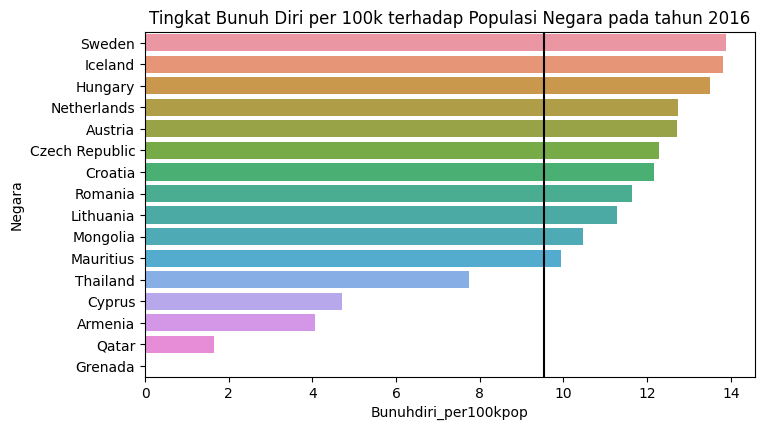

In [56]:
filtered_2016 = filtered[filtered['Tahun']==2016]


Bunuhdiri_Negara= filtered_2016.groupby('Negara').mean().sort_values('Bunuhdiri_per100kpop', ascending=False).reset_index()


plt.figure(figsize=(14,8))
plt.subplot(221)
sns.barplot(x='Bunuhdiri_per100kpop',y='Negara',data=Bunuhdiri_Negara)
plt.axvline(x=Bunuhdiri_Negara['Bunuhdiri_per100kpop'].mean(), color='k')
plt.gca().xaxis.tick_bottom()
plt.title('Tingkat Bunuh Diri per 100k terhadap Populasi Negara pada tahun 2016')

plt.tight_layout()

In [57]:
#Banyak Negara pada tahun 2016
filtered_2016['Negara'].nunique()

16

Insight:
* Berdasarkan informasi baru tersebut, outliers yang berada pada tahun 2016 terjadi karena hanya terdapat 16 dari 108 negara di tahun tersebut. Data-data tersebut sangat penting dan berdasarkan data selanjutnya yaitu tahun 2017, 2018, 2019 memang mengalami penurunan tingkat kasus bunuh diri tersebut.
* oleh karena itu, outliers ini diabaikan dan tidak dihapus.



---



## 5  Visualisasi Data

### 5.1 Persentase Data

### 5.1.1 Persentase Kasus Bunuh Diri terhadap benua pada periode 2001-2020

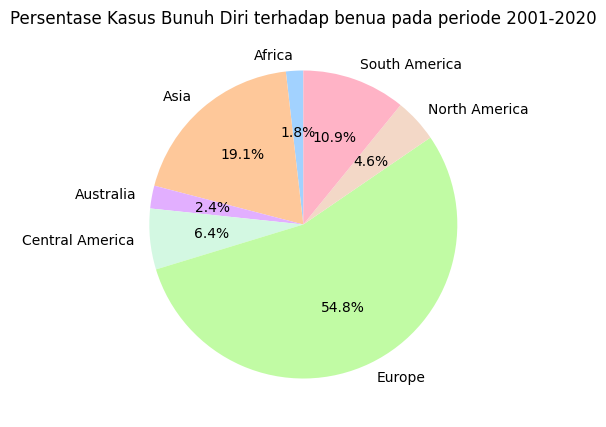

In [58]:
data_grp_mf = suicide_trend.groupby(by=['Benua']).agg({"Bunuhdiri_per100kpop": ['sum']})
data_grp_mf.columns = ['Total_Bunuhdiri']
data_grp_mf.reset_index(inplace=True)
# data_grp_mf

fig1, ax1 = plt.subplots(figsize=(12, 5))
wedges, texts, autotexts = ax1.pie(data_grp_mf['Total_Bunuhdiri'], labels=data_grp_mf['Benua'], autopct='%1.1f%%', startangle=90, colors=['#a2d2ff', '#fec89a','#e2afff','#d3f8e2', '#c1fba4', '#f3d8c7', '#ffb3c6'])
ax1.axis()
plt.title('Persentase Kasus Bunuh Diri terhadap benua pada periode 2001-2020')

plt.setp(autotexts, size=10, color="black")
plt.show()

* Benua eropa memiliki kasus bunuh diri terbanyak dari Seluruh benua.

### 5.1.2 Berapa persen perbedaan tingkat kasus bunuh diri pada lak-laki dan perempuan?

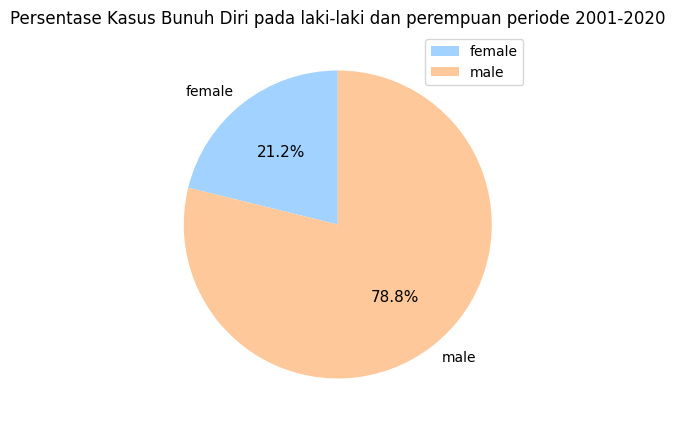

In [59]:
data_grp_mf = suicide_trend.groupby(by=['Jenis_Kelamin']).agg({"Bunuhdiri_per100kpop": ['sum']})
data_grp_mf.columns = ['Total_Bunuhdiri']
data_grp_mf.reset_index(inplace=True)
# data_grp_mf

fig1, ax1 = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax1.pie(data_grp_mf['Total_Bunuhdiri'], labels=data_grp_mf['Jenis_Kelamin'], autopct='%1.1f%%', startangle=90, colors=['#a2d2ff', '#fec89a'])
ax1.axis()
plt.title('Persentase Kasus Bunuh Diri pada laki-laki dan perempuan periode 2001-2020')

plt.setp(autotexts, size=11, color="black")
plt.legend()
plt.show()

***Insight***
* persentase kasus bunuh diri terjadi lebih besar pada laki-laki dibandingkan dengan perempuan
* hampir ~80% kasus bunuh diri didominasi oleh laki-laki

### 5.1.3 Persentase umur kasus bunuh diri pada periode 2001-2020

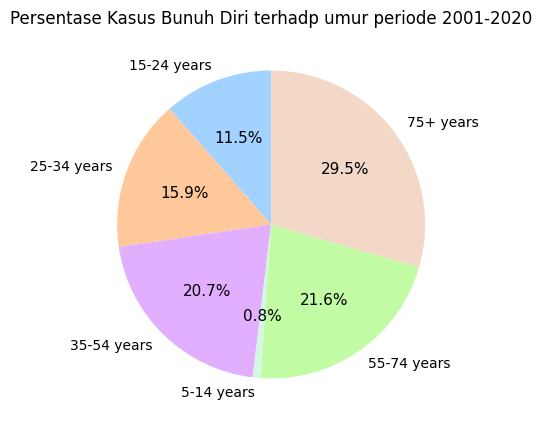

In [60]:
data_grp_mf = suicide_trend.groupby(by=['Umur']).agg({"Bunuhdiri_per100kpop": ['sum']})
data_grp_mf.columns = ['Total_Bunuhdiri']
data_grp_mf.reset_index(inplace=True)
# data_grp_mf

fig1, ax1 = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax1.pie(data_grp_mf['Total_Bunuhdiri'], labels=data_grp_mf['Umur'], autopct='%1.1f%%', startangle=90, colors=['#a2d2ff', '#fec89a','#e2afff','#d3f8e2', '#c1fba4', '#f3d8c7'])
ax1.axis()
plt.title('Persentase Kasus Bunuh Diri terhadp umur periode 2001-2020')

plt.setp(autotexts, size=11, color="black")
plt.show()

***Insight***
* persentase kasus bunuh diri terjadi lebih besar pada orang yang berusia 75+ tahun. Usia yang terlalu tua dapat mendorong seseorang melakukan bunuh diri
* Selanjutnya disusul oleh orang-orang yang berusia 55-74 tahun. Artinya, semakin lama seseoran hidup, semaking besar seseorang tersebut akan melakukan bunuh diri

### 5.2 **Rata-rata tingkat kasus bunuh diri terhadap waktu**

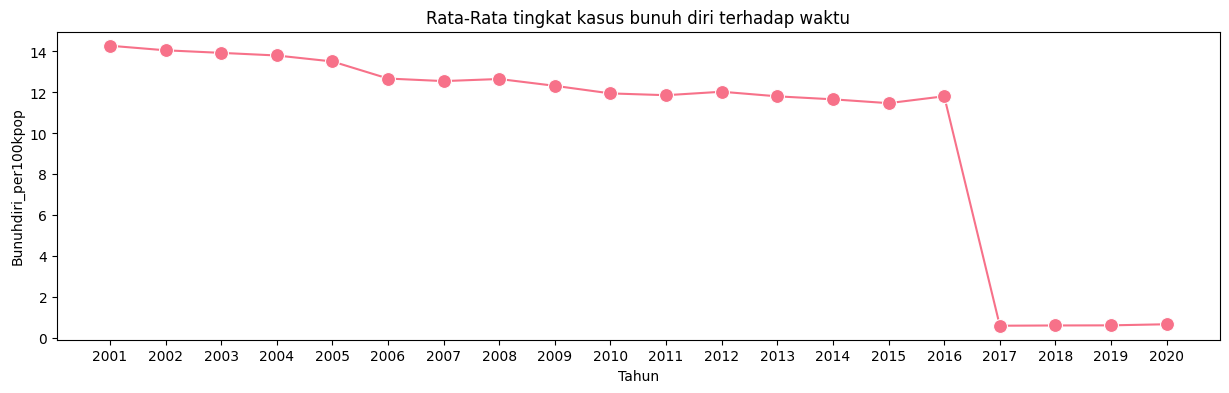

In [61]:
# plot rata-rata bunuhdiri terhadap tahun
data_suicide= s_duplicate.copy()
data_suicide.Tahun= data_suicide.Tahun.apply(str)
data_popk_year = data_suicide.groupby(by=['Tahun']).agg({'Jumlah_Bunuhdiri':['sum'], 'populasi': ['sum']})
data_popk_year.columns = ['Total_Bunuhdiri', 'Total_populasi']
data_popk_year = data_popk_year.reset_index()

data_popk_year['Bunuhdiri_per100kpop'] = data_popk_year['Total_Bunuhdiri'] / data_popk_year['Total_populasi'] * 100000
# data_popk_year
plt.figure(figsize=(15, 4))
sns.lineplot(x="Tahun", y="Bunuhdiri_per100kpop", marker='o', markersize=10, color='#f77189', data=data_popk_year)
plt.title("Rata-Rata tingkat kasus bunuh diri terhadap waktu")
plt.show()

***Insight***
* Terdapat penurunan rata-rata tingkat kasus bunuh diri yang signifikan pada tahun 2016 ke 2017
* Selama berjalannya waktu, tingkat kasus bunuh diri samking menurun secara sedikit-sedikit

### 5.3 **Rata-rata tingkat kasus bunuh diri pada Jenis kelamin terhadap waktu**

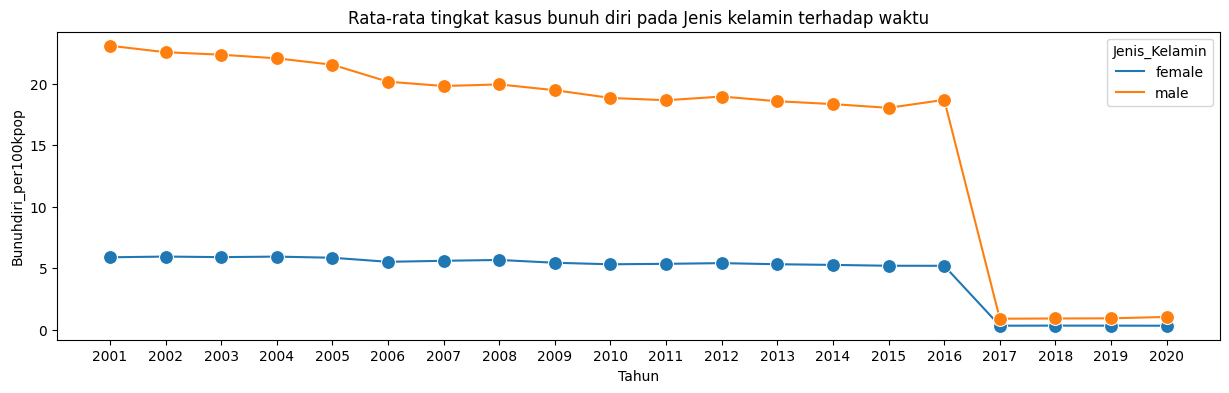

In [62]:
# plot rata-rata bunuhdiri terhadap tahun
data_suicide= s_duplicate.copy()
data_suicide.Tahun= data_suicide.Tahun.apply(str)
data_popk_year = data_suicide.groupby(by=['Tahun', 'Jenis_Kelamin']).agg({'Jumlah_Bunuhdiri':['sum'], 'populasi': ['sum']})
data_popk_year.columns = ['Total_Bunuhdiri', 'Total_populasi']
data_popk_year = data_popk_year.reset_index()

data_popk_year['Bunuhdiri_per100kpop'] = data_popk_year['Total_Bunuhdiri'] / data_popk_year['Total_populasi'] * 100000
# data_popk_year
plt.figure(figsize=(15, 4))
sns.lineplot(x="Tahun", y="Bunuhdiri_per100kpop", hue= 'Jenis_Kelamin', marker='o', markersize=10, color='#f77189', data=data_popk_year)
plt.title("Rata-rata tingkat kasus bunuh diri pada Jenis kelamin terhadap waktu")
plt.show()

***Insight***
* Secara global, laki-laki lebih rentan mengalami bunuh diri yang hampir ~ 5 kali lebih tinggi dibandingkan perempuan.
* terdapat penurunan signifikan bada tahun 2016 ke 2017
* Tingkat kasus bunuh diri pada laki laki secara lambat mengalami penurunan seiring berjalannya waktu. Namun kasus bunuh diri pada perempuan hampir tidak mengalami perubahan.

### 5.4 **Rata-rata tingkat kasus bunuh diri pada Umur terhadap waktu**

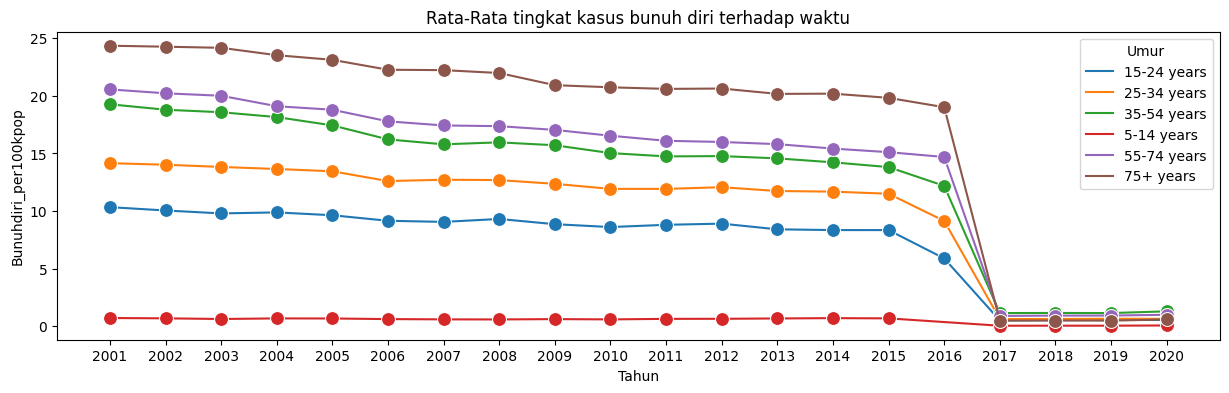

In [63]:
# plot rata-rata bunuhdiri terhadap tahun
data_suicide= s_duplicate.copy()
data_suicide.Tahun= data_suicide.Tahun.apply(str)
data_popk_year = data_suicide.groupby(by=['Tahun', 'Umur']).agg({'Jumlah_Bunuhdiri':['sum'], 'populasi': ['sum']})
data_popk_year.columns = ['Total_Bunuhdiri', 'Total_populasi']
data_popk_year = data_popk_year.reset_index()

data_popk_year['Bunuhdiri_per100kpop'] = data_popk_year['Total_Bunuhdiri'] / data_popk_year['Total_populasi'] * 100000
# data_popk_year
plt.figure(figsize=(15, 4))
sns.lineplot(x="Tahun", y="Bunuhdiri_per100kpop", hue= 'Umur', marker='o', markersize=10, color='#f77189', data=data_popk_year)
plt.title("Rata-Rata tingkat kasus bunuh diri terhadap waktu")
plt.show()

***Insight***
* Secara global, umur 75+ tahun yang disusul oleh dewasa berumur 25 - 34 thaun sangat rentang untuk melakukan bunuh diri.
* untuk setiap kategori umur mengalami penurunan secara lambat dan hampir linear.

## 6 STATISTICAL TESTS

***Key Notes***
* Tentukan apakah variabel prediktor memiliki hubungan statistik secara signifikan dengan variabel yang diinginkan
* Perkirakan perbedaan 2 group




#### 6.1 **Test 1: Mengecek apakah terdapat perbedaan tingkat kasus bunuh diri pada laki-laki dan perempuan**

Karena Jenis kelamin terdiri dari 2 kategori group dan dependen variabel maka digunakan t-test. Hipotesis tesnya, yaitu:

**H0** : Tidak ada perbedaan tingkat kasus bunuh diri pada laki-laki dan perempuan (Null)

**H1** : Terdapat perbedaan tingkat kasus bunuh diri pada laki-laki dan perempuan (Alternate)

In [64]:
suicide_trend.head(1)

,index,Negara,Tahun,Jenis_Kelamin,Umur,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,GDP_perkapita_usd,Latitude,Longitude,Benua
0,144,Albania,2001,male,25-34 years,22.0,206484,10.7,1451.0,41.3,19.8,Europe


In [65]:
hypotesis_s= suicide_trend.copy()
#Ambil kasus bunuh diri pada perempuan
perempuan = hypotesis_s['Bunuhdiri_per100kpop'][hypotesis_s['Jenis_Kelamin']== 'female']
perempuan

3       4.2
5       3.3
6       3.2
8       3.2
10      1.8
         ..
17687   1.4
17688   0.6
17689   0.4
17690   0.1
17691   0.0
Name: Bunuhdiri_per100kpop, Length: 8846, dtype: float64

In [66]:
#Ambil kasus bunuh diri pada laki_laki
laki_laki = hypotesis_s['Bunuhdiri_per100kpop'][hypotesis_s['Jenis_Kelamin']== 'male']
laki_laki

0       10.7
1        9.0
2        5.6
4        3.9
7        3.2
        ... 
17681    1.0
17682    1.0
17683    1.6
17684    0.5
17685    0.0
Name: Bunuhdiri_per100kpop, Length: 8846, dtype: float64

In [67]:
#hitung p value
ttest, pval = stats.ttest_rel(perempuan, laki_laki)

if pval<0.05:
  print("Tolak Hipotesis H0")
else:
  print("Terima Hipotesis H0")

Tolak Hipotesis H0


Kesimpulan tes:

* Berdasarkan T-Test tersebut, hipotesis H0 ditolak. Artinya, terdapat perbedaan tingkat kasus bunuh diri antara laki-laki dan perempuan.

### 6.2 Tes 2: Mengetahui apakah tingkat kasus bunuh diri tergantung dari umur

Karena umur merupakan data independen dengan terdiri lebih dari 2 group kategori, maka digunakan chi-square. Hipotesis tesnya, yaitu:

H0 : Tingkat kasus bunuh diri dan umur tidak saling ketergantungan (independen) (Null)

H1 : ingkat kasus bunuh diri dan umur saling ketergantungan (dependen) (Alternate)



In [68]:
hypotesis_s.head(1)

,index,Negara,Tahun,Jenis_Kelamin,Umur,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,GDP_perkapita_usd,Latitude,Longitude,Benua
0,144,Albania,2001,male,25-34 years,22.0,206484,10.7,1451.0,41.3,19.8,Europe


In [69]:
#Membuat tabel kontigensi
contigency_table= pd.crosstab(hypotesis_s.Bunuhdiri_per100kpop, hypotesis_s.Umur)

In [70]:
#significant level 5%
alpha= 0.05

chistat, p, dof, expected = stats.chi2_contingency(contigency_table)

In [71]:
#Nilai kritis
critical_value = stats.chi2.ppf(q=1-alpha, df =dof)
print('critical_value:', critical_value)

critical_value: 30399.005452361405


In [72]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p)

Significance level:  0.05
Degree of Freedom:  29995
chi-square statistic: 36398.963917553905
critical_value: 30399.005452361405
p-value: 9.372751702755389e-133


* p-value bernilai 9.372751702755389e-133 yang nilainya sangat mendekati atau sama dengan. Artinya, hipotesis H0 ditolak.

In [73]:
 #compare chi_square_statistic with critical_value and p-value which is the
 #probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Cstat>= critical_value, maka Tolak H0,  ada ketergantungan antara Umur dan tingkat kasus bunuh diri")
else:
    print("Cstat< critical_value, maka terima H0, tidak ada ketergantungan antara Umur dan tingkat kasus bunuh diri")

if p<=alpha:
    print(" p<=alpha, maka terima H0, terdapat ketergantungan antara Umur dan tingkat kasus bunuh diri")
else:
    print("p>alpha, maka Tolak H0, tidak terdapat ketergantungan antara Umur dan tingkat kasus bunuh diri.")

Cstat>= critical_value, maka Tolak H0,  ada ketergantungan antara Umur dan tingkat kasus bunuh diri
 p<=alpha, maka terima H0, terdapat ketergantungan antara Umur dan tingkat kasus bunuh diri


* Berdasarkan informasi tersebut, hal ini berarti terdapat ketergantungan antara umur dan tingkat kasus bunuh diri. Faktor umur mempengaruhi tingkat kasus bunuh diri.

### 6.3 Visualisasi Tingkat Kasus Bunuh diri terhadap Usia dan Jenis_Kelamin

In [74]:
#group umur dan jenis kelamin terhadap Bunuhdiri_per100kpop dan GDP_perkapita_usd

by_Jenis_Kelamin = suicide_trend.groupby(['Jenis_Kelamin']).mean().sort_values('Bunuhdiri_per100kpop', ascending=True).reset_index()
by_Jenis_Kelamin_Tahun = suicide_trend.groupby(['Jenis_Kelamin','Tahun']).mean().sort_values('Bunuhdiri_per100kpop', ascending=True).reset_index()
by_Jenis_Kelamin_Umur = suicide_trend.groupby(['Jenis_Kelamin','Umur']).mean().sort_values('Bunuhdiri_per100kpop', ascending=True).reset_index()

<ipython-input-74-582cbe0c0488>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_Jenis_Kelamin = suicide_trend.groupby(['Jenis_Kelamin']).mean().sort_values('Bunuhdiri_per100kpop', ascending=True).reset_index()
<ipython-input-74-582cbe0c0488>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_Jenis_Kelamin_Tahun = suicide_trend.groupby(['Jenis_Kelamin','Tahun']).mean().sort_values('Bunuhdiri_per100kpop', ascending=True).reset_index()
<ipython-input-74-582cbe0c0488>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default t

<ipython-input-75-8f2924d69461>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Jenis_Kelamin',y='Bunuhdiri_per100kpop', data=by_Jenis_Kelamin,alpha=0.7,  ci='sd')


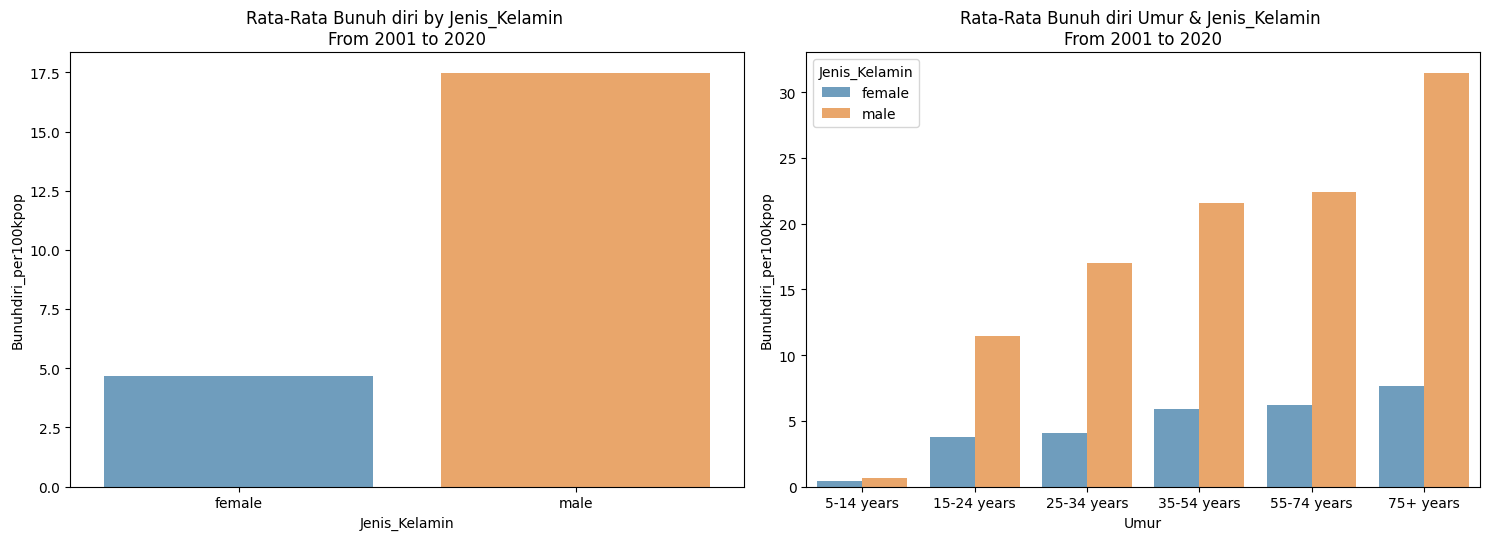

In [75]:
# visualisasi
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(x='Jenis_Kelamin',y='Bunuhdiri_per100kpop', data=by_Jenis_Kelamin,alpha=0.7,  ci='sd')
plt.gca().xaxis.tick_bottom()
plt.title('Rata-Rata Bunuh diri by Jenis_Kelamin \nFrom 2001 to 2020')

plt.subplot(222)
sns.barplot(x='Umur',y='Bunuhdiri_per100kpop', hue='Jenis_Kelamin', data=by_Jenis_Kelamin_Umur,alpha=0.7)
plt.gca().xaxis.tick_bottom()
plt.title('Rata-Rata Bunuh diri Umur & Jenis_Kelamin \nFrom 2001 to 2020')

plt.tight_layout()

Insight:
* Rata-rata tingkat bunuh diri per 100k populasi untuk tahun 2001 hingga 2020 terjadi pada laki-laki sebanyak 18 orang per 100k populasi. Sementara perempuan yaitu sebanyak 5 orang per 100k populasi.
* Rata-rata tingkat bunuh diri pada laki-laki 3.6 lebih tinggi dibandingkan perempuan.
* Selain itu, rata-rata tingkat bunuh diri per 100k populasi tertinggi berdasarkan Kategori usia adalah berusia 75+ tahun, dengan 34 orang laki-laki per 100k populasi dan 9 orang perempuan per 100k populasi. Dengan laki-laki rentan pada usia 75+ tahun 3.8 lebih tinggi dari pada perempuan



---



## 7 Korelasi



---



### 7.1 Apakah terdapat korelasi antara Rata-Rata tingkat kasus bunuh diri pada GDP dengan Tingkat Kasus Bunuh Diri

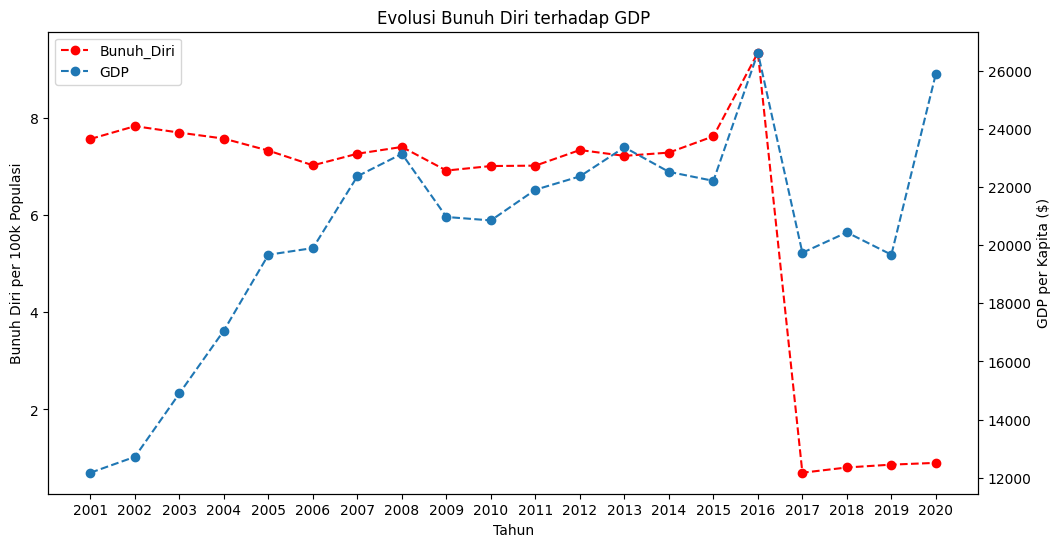

In [76]:
# Plotting Suicides/100k of population and GDP_per_capita as a function of years

filtered.Tahun= filtered.Tahun.apply(str)

BunuhDiri_Tahun_GDP = filtered[['Bunuhdiri_per100kpop','Tahun','GDP_perkapita_usd']].groupby(['Tahun']).mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot the suicides over the years.
ln1 = ax1.plot(BunuhDiri_Tahun_GDP['Tahun'], BunuhDiri_Tahun_GDP['Bunuhdiri_per100kpop'], 'ro--', label='Bunuh_Diri')
plt.gca().xaxis.tick_bottom()
# Adding GDP plot to the same plot, but on different scale.
ax2 = ax1.twinx()
ln2 = ax2.plot(BunuhDiri_Tahun_GDP['Tahun'], BunuhDiri_Tahun_GDP['GDP_perkapita_usd'], 'o--', label='GDP')

# Joining legends.
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc=2)

# Setting labels
ax1.set_ylabel('Bunuh Diri per 100k Populasi')
ax2.set_ylabel('GDP per Kapita ($)')
ax1.set_xlabel('Tahun')

plt.title ('Evolusi Bunuh Diri terhadap GDP')

plt.show()

In [77]:
BunuhDiri_Tahun_GDP.Tahun= BunuhDiri_Tahun_GDP.Tahun.apply(int)
BunuhDiri_Tahun_GDP.corr()

,Tahun,Bunuhdiri_per100kpop,GDP_perkapita_usd
Tahun,1.0,-0.7,0.7
Bunuhdiri_per100kpop,-0.7,1.0,-0.1
GDP_perkapita_usd,0.7,-0.1,1.0


### 7.2 **Visualisi Korelasi**

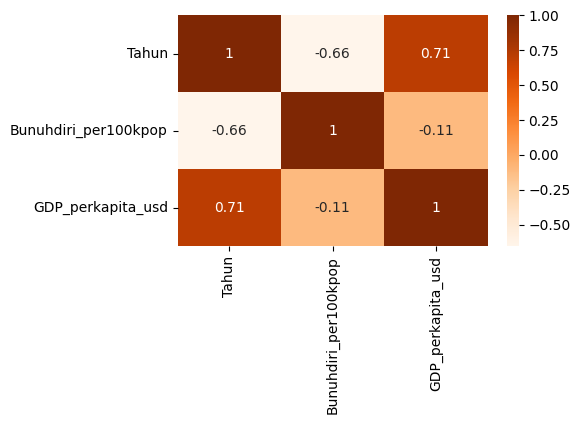

In [78]:
#Korelasi Heatmap

plt.figure(figsize=(5,3))
sns.heatmap(BunuhDiri_Tahun_GDP.corr(), annot=True, cmap='Oranges')
plt.show()

***Insight:***
* korelasi antara Bunuhdiri_per100kpop dan GDP_perkapita_usd adalah -0.11. Hal ini berarti hubungan antara negara-negara kaya dan tingkat bunuh diri tidak sebanding dan tidak ada korelasi.
* Besarnya korelasi antara GDP_perkapita_usd dan Tahun berarti secara global manusia akan semakin kaya seiring bertambahnya waktu
* Seiring berjalannya waktu, tingkat bunuh diri per 100k populasi semakin menurun.




---



### 7.3 Visualisasi Korelasi Keseluruhan data

In [79]:
Korelasi_keseluruhan=suicide_trend.corr()
Korelasi_keseluruhan

<ipython-input-79-2db885babfe1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Korelasi_keseluruhan=suicide_trend.corr()


,index,Tahun,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,GDP_perkapita_usd,Latitude,Longitude
index,1.0,0.4,0.1,0.3,-0.0,0.1,0.0,0.2
Tahun,0.4,1.0,-0.0,0.3,-0.1,0.2,0.0,0.0
Jumlah_Bunuhdiri,0.1,-0.0,1.0,0.2,0.2,0.1,0.1,0.1
populasi,0.3,0.3,0.2,1.0,-0.1,-0.0,-0.0,0.0
Bunuhdiri_per100kpop,-0.0,-0.1,0.2,-0.1,1.0,0.0,0.1,0.1
GDP_perkapita_usd,0.1,0.2,0.1,-0.0,0.0,1.0,0.3,0.2
Latitude,0.0,0.0,0.1,-0.0,0.1,0.3,1.0,0.1
Longitude,0.2,0.0,0.1,0.0,0.1,0.2,0.1,1.0


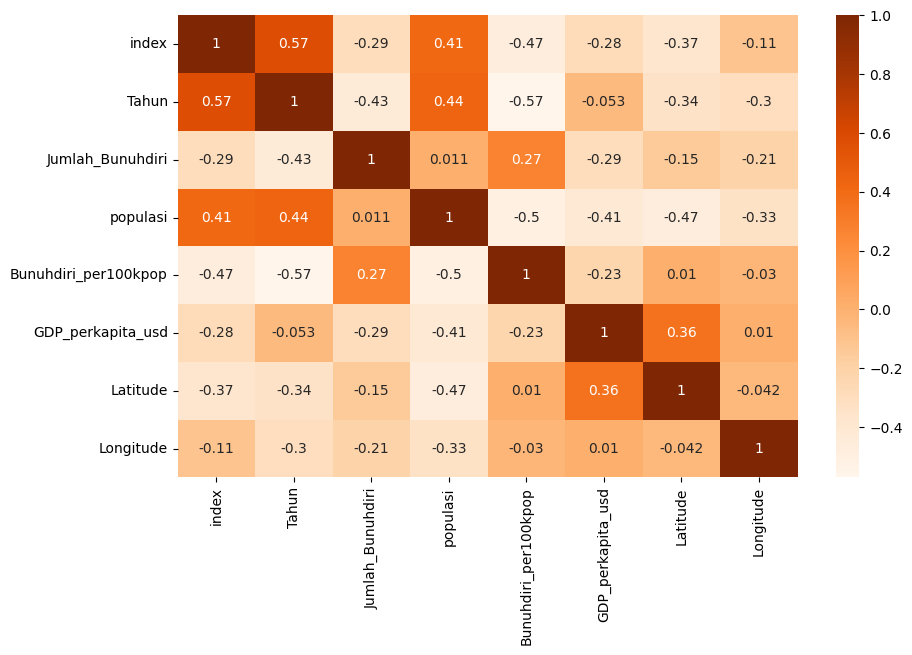

In [80]:
#Korelasi Heatmap

plt.figure(figsize=(10,6))
sns.heatmap(Korelasi_keseluruhan.corr(), annot=True, cmap='Oranges')
plt.show()

***Insight***

* Tingkat kasus bunuh diri tidak mengalami peningkatan terhadap tahun, namun menurun sedikit demi sedikit
* Terdapat sedikit pengaruh kenaikan kasus bunuh diri terhadap meningkatnya GPT suatu negara. Semakin kaya negara tersebut, semakin besar kemungkinan kasus bunuh diri akan terjadi.
* Nilai GPT per kapita akan meningkat seiring dengan waktu.

# 8 Kesimpulan


Berikut adalah kesimpulan dari analisis perilaku dan tingkat kasus bunuh diri pada tahun 2001- 2020:
* Benua eropa memiliki rata-rata tingkat kasus bunuh diri paling banyak
* Negara paling tinggi tingkat kasus bunuh dirinya adalah Korea selatan
* kasus bunuh diri didominasi oleh laki-laki berusia diatas 34 tahun.
* Semakin tua seseorang, semakin rentan pula orang tersebut melakukan bunuh diri.
* Seiring dengan berjalannya waktu, rata-rata tingkat kasus bunuh diri menurun
* Nilai GDP per kapita sedikit berbanding lurus dengan banyaknya rata-rata kasus bunuh diri.


# 9 Import Dataframe to CSV

In [81]:
# Membuat salinan dari variable yang telah bersih
down= suicide_trend.copy()

In [82]:
# Ubah tipe data objek Tahun menjadi objek (dari yang awalnya integer)
down['Tahun']= down['Tahun'].apply(str)

In [83]:
# Ubah menjadi datetime agar dapat terbaca di looker studio
down['Tahun']= down['Tahun'].astype('datetime64[ns]')
down.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17692 entries, 0 to 17691
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 17692 non-null  int64         
 1   Negara                17692 non-null  object        
 2   Tahun                 17692 non-null  datetime64[ns]
 3   Jenis_Kelamin         17692 non-null  object        
 4   Umur                  17692 non-null  object        
 5   Jumlah_Bunuhdiri      17692 non-null  float64       
 6   populasi              17692 non-null  int64         
 7   Bunuhdiri_per100kpop  17692 non-null  float64       
 8   GDP_perkapita_usd     17692 non-null  float64       
 9   Latitude              17692 non-null  float64       
 10  Longitude             17692 non-null  float64       
 11  Benua                 17692 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 1.6+ M

In [84]:
#Reset index data tersebut
csv_download = down.reset_index(drop= True)
csv_download

,index,Negara,Tahun,Jenis_Kelamin,Umur,Jumlah_Bunuhdiri,populasi,Bunuhdiri_per100kpop,GDP_perkapita_usd,Latitude,Longitude,Benua
0,144,Albania,2001-01-01,male,25-34 years,22.0,206484,10.7,1451.0,41.3,19.8,Europe
1,145,Albania,2001-01-01,male,35-54 years,34.0,378826,9.0,1451.0,41.3,19.8,Europe
2,146,Albania,2001-01-01,male,55-74 years,11.0,196670,5.6,1451.0,41.3,19.8,Europe
3,147,Albania,2001-01-01,female,75+ years,2.0,47254,4.2,1451.0,41.3,19.8,Europe
4,148,Albania,2001-01-01,male,15-24 years,10.0,256039,3.9,1451.0,41.3,19.8,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
17687,30279,Uzbekistan,2019-01-01,female,15-24 years,456.0,33580350,1.4,1784.0,41.3,69.2,Asia
17688,30607,Uzbekistan,2019-01-01,female,25-34 years,212.0,33580350,0.6,1784.0,41.3,69.2,Asia
17689,30935,Uzbekistan,2019-01-01,female,35-54 years,118.0,33580350,0.4,1784.0,41.3,69.2,Asia
17690,31263,Uzbekistan,2019-01-01,female,55-74 years,26.0,33580350,0.1,1784.0,41.3,69.2,Asia


In [85]:
#panggil data download tersebut dan simpan pada csv
from google.colab import files
csv_download.to_csv('Tingkat_Bunuhdiri_err.csv', encoding = 'utf-8-sig')
files.download('Tingkat_Bunuhdiri_err.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>